# House Value Prediction Project

# Problem Statement:
        Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

# Business Goal:
        You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Let's Begin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset in dataframe
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
#checking the data 
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df.shape

(1168, 81)

In [5]:
df_test.shape

(292, 80)

There are 1168 rows and 81 columns in the training dataset & Test dataset has 80 cols and 292 rows

In [6]:
#checking the null values 
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i+"---------------",df[i].isnull().sum())

LotFrontage--------------- 214
Alley--------------- 1091
MasVnrType--------------- 7
MasVnrArea--------------- 7
BsmtQual--------------- 30
BsmtCond--------------- 30
BsmtExposure--------------- 31
BsmtFinType1--------------- 30
BsmtFinType2--------------- 31
FireplaceQu--------------- 551
GarageType--------------- 64
GarageYrBlt--------------- 64
GarageFinish--------------- 64
GarageQual--------------- 64
GarageCond--------------- 64
PoolQC--------------- 1161
Fence--------------- 931
MiscFeature--------------- 1124


Features consists more null values.
So,we can drop few columns such as 'Alley','PoolQC','Fence','MiscFeature' because of more null values

In [7]:
#droping the features which are null values filled
df.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
#checking the null values 
for i in df_test.columns:
    if df_test[i].isnull().sum() > 0:
        print(i+"---------------",df_test[i].isnull().sum())

LotFrontage--------------- 45
Alley--------------- 278
MasVnrType--------------- 1
MasVnrArea--------------- 1
BsmtQual--------------- 7
BsmtCond--------------- 7
BsmtExposure--------------- 7
BsmtFinType1--------------- 7
BsmtFinType2--------------- 7
Electrical--------------- 1
FireplaceQu--------------- 139
GarageType--------------- 17
GarageYrBlt--------------- 17
GarageFinish--------------- 17
GarageQual--------------- 17
GarageCond--------------- 17
PoolQC--------------- 292
Fence--------------- 248
MiscFeature--------------- 282


In [9]:
#droping the features which are null values filled
df_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

There are categorical and numerical data present in the data

The target feature is numercal and continuous in nature so this is the regression problem

<AxesSubplot:>

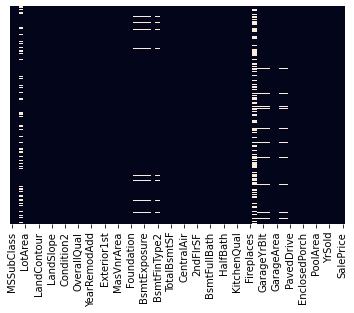

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [12]:
#checking the null values 
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i+"---------------",df[i].isnull().sum())

LotFrontage--------------- 214
MasVnrType--------------- 7
MasVnrArea--------------- 7
BsmtQual--------------- 30
BsmtCond--------------- 30
BsmtExposure--------------- 31
BsmtFinType1--------------- 30
BsmtFinType2--------------- 31
FireplaceQu--------------- 551
GarageType--------------- 64
GarageYrBlt--------------- 64
GarageFinish--------------- 64
GarageQual--------------- 64
GarageCond--------------- 64


There are few features with years mention , we need to extract the years in numbers

In [13]:
df['Built_Age']=df['YearBuilt'].max() - df['YearBuilt']
df['RemodAdded_Time']=df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Sold_Time']=df['YrSold'].max() - df['YrSold']
df['Garage_Age']=df['GarageYrBlt'].max() - df['GarageYrBlt']

In [14]:
# droping the columns after feature extraction
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

In [15]:
df_test['Built_Age']=df_test['YearBuilt'].max() - df_test['YearBuilt']
df_test['RemodAdded_Time']=df_test['YearRemodAdd'].max() - df_test['YearRemodAdd']
df_test['Sold_Time']=df_test['YrSold'].max() - df_test['YrSold']
df_test['Garage_Age']=df_test['GarageYrBlt'].max() - df_test['GarageYrBlt']

In [16]:
# droping the columns after feature extraction in test set
df_test.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

In [17]:
#filling the lotfrontage with mean
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [18]:
#filling the lotfrontage with mean
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [19]:
# creating different list of categorical and numerical columns of training set
df_cat=[]
df_num=[]
for col in df.columns:
    if (df[col].dtype=='object'):
        df_cat.append(col)
    else:
        df_num.append(col)

In [20]:
# creating different list of categorical and numerical columns of test set
df_test_cat=[]
df_test_num=[]
for col in df_test.columns:
    if (df_test[col].dtype=='object'):
        df_test_cat.append(col)
    else:
        df_test_num.append(col)

In [21]:
#filling the categorical feature's null values with mode (training set)
for i in df_cat:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [22]:
#filling the categorical feature's null values with mode (test set)
for i in df_test_cat:
    if df_test[i].isnull().sum() > 0:
        df_test[i].fillna(df_test[i].mode()[0],inplace=True)

In [23]:
#filling the numerical feature's null values with mode (training set)
for i in df_num:
    if df[i].isnull().sum() > 0:
        print(i)

Garage_Age


In [24]:
#filling the numerical feature's null values with mode (test set)
for i in df_test_num:
    if df_test[i].isnull().sum() > 0:
        print(i)

Garage_Age


In [25]:
mean_value=df['Garage_Age'].mean()
df['Garage_Age'].fillna(value=mean_value, inplace=True)

In [26]:
mean_value=df_test['Garage_Age'].mean()
df_test['Garage_Age'].fillna(value=mean_value, inplace=True)

<AxesSubplot:>

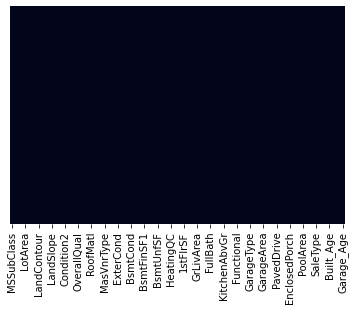

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

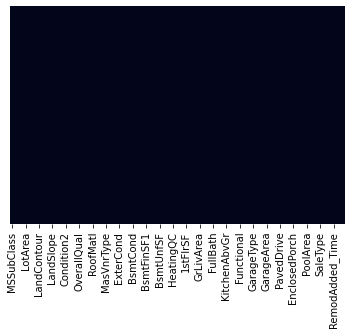

In [28]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

# Explodiatory Data Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1168 non-null   int64  
 1   MSZoning         1168 non-null   object 
 2   LotFrontage      1168 non-null   float64
 3   LotArea          1168 non-null   int64  
 4   Street           1168 non-null   object 
 5   LotShape         1168 non-null   object 
 6   LandContour      1168 non-null   object 
 7   Utilities        1168 non-null   object 
 8   LotConfig        1168 non-null   object 
 9   LandSlope        1168 non-null   object 
 10  Neighborhood     1168 non-null   object 
 11  Condition1       1168 non-null   object 
 12  Condition2       1168 non-null   object 
 13  BldgType         1168 non-null   object 
 14  HouseStyle       1168 non-null   object 
 15  OverallQual      1168 non-null   int64  
 16  OverallCond      1168 non-null   int64  
 17  RoofStyle     

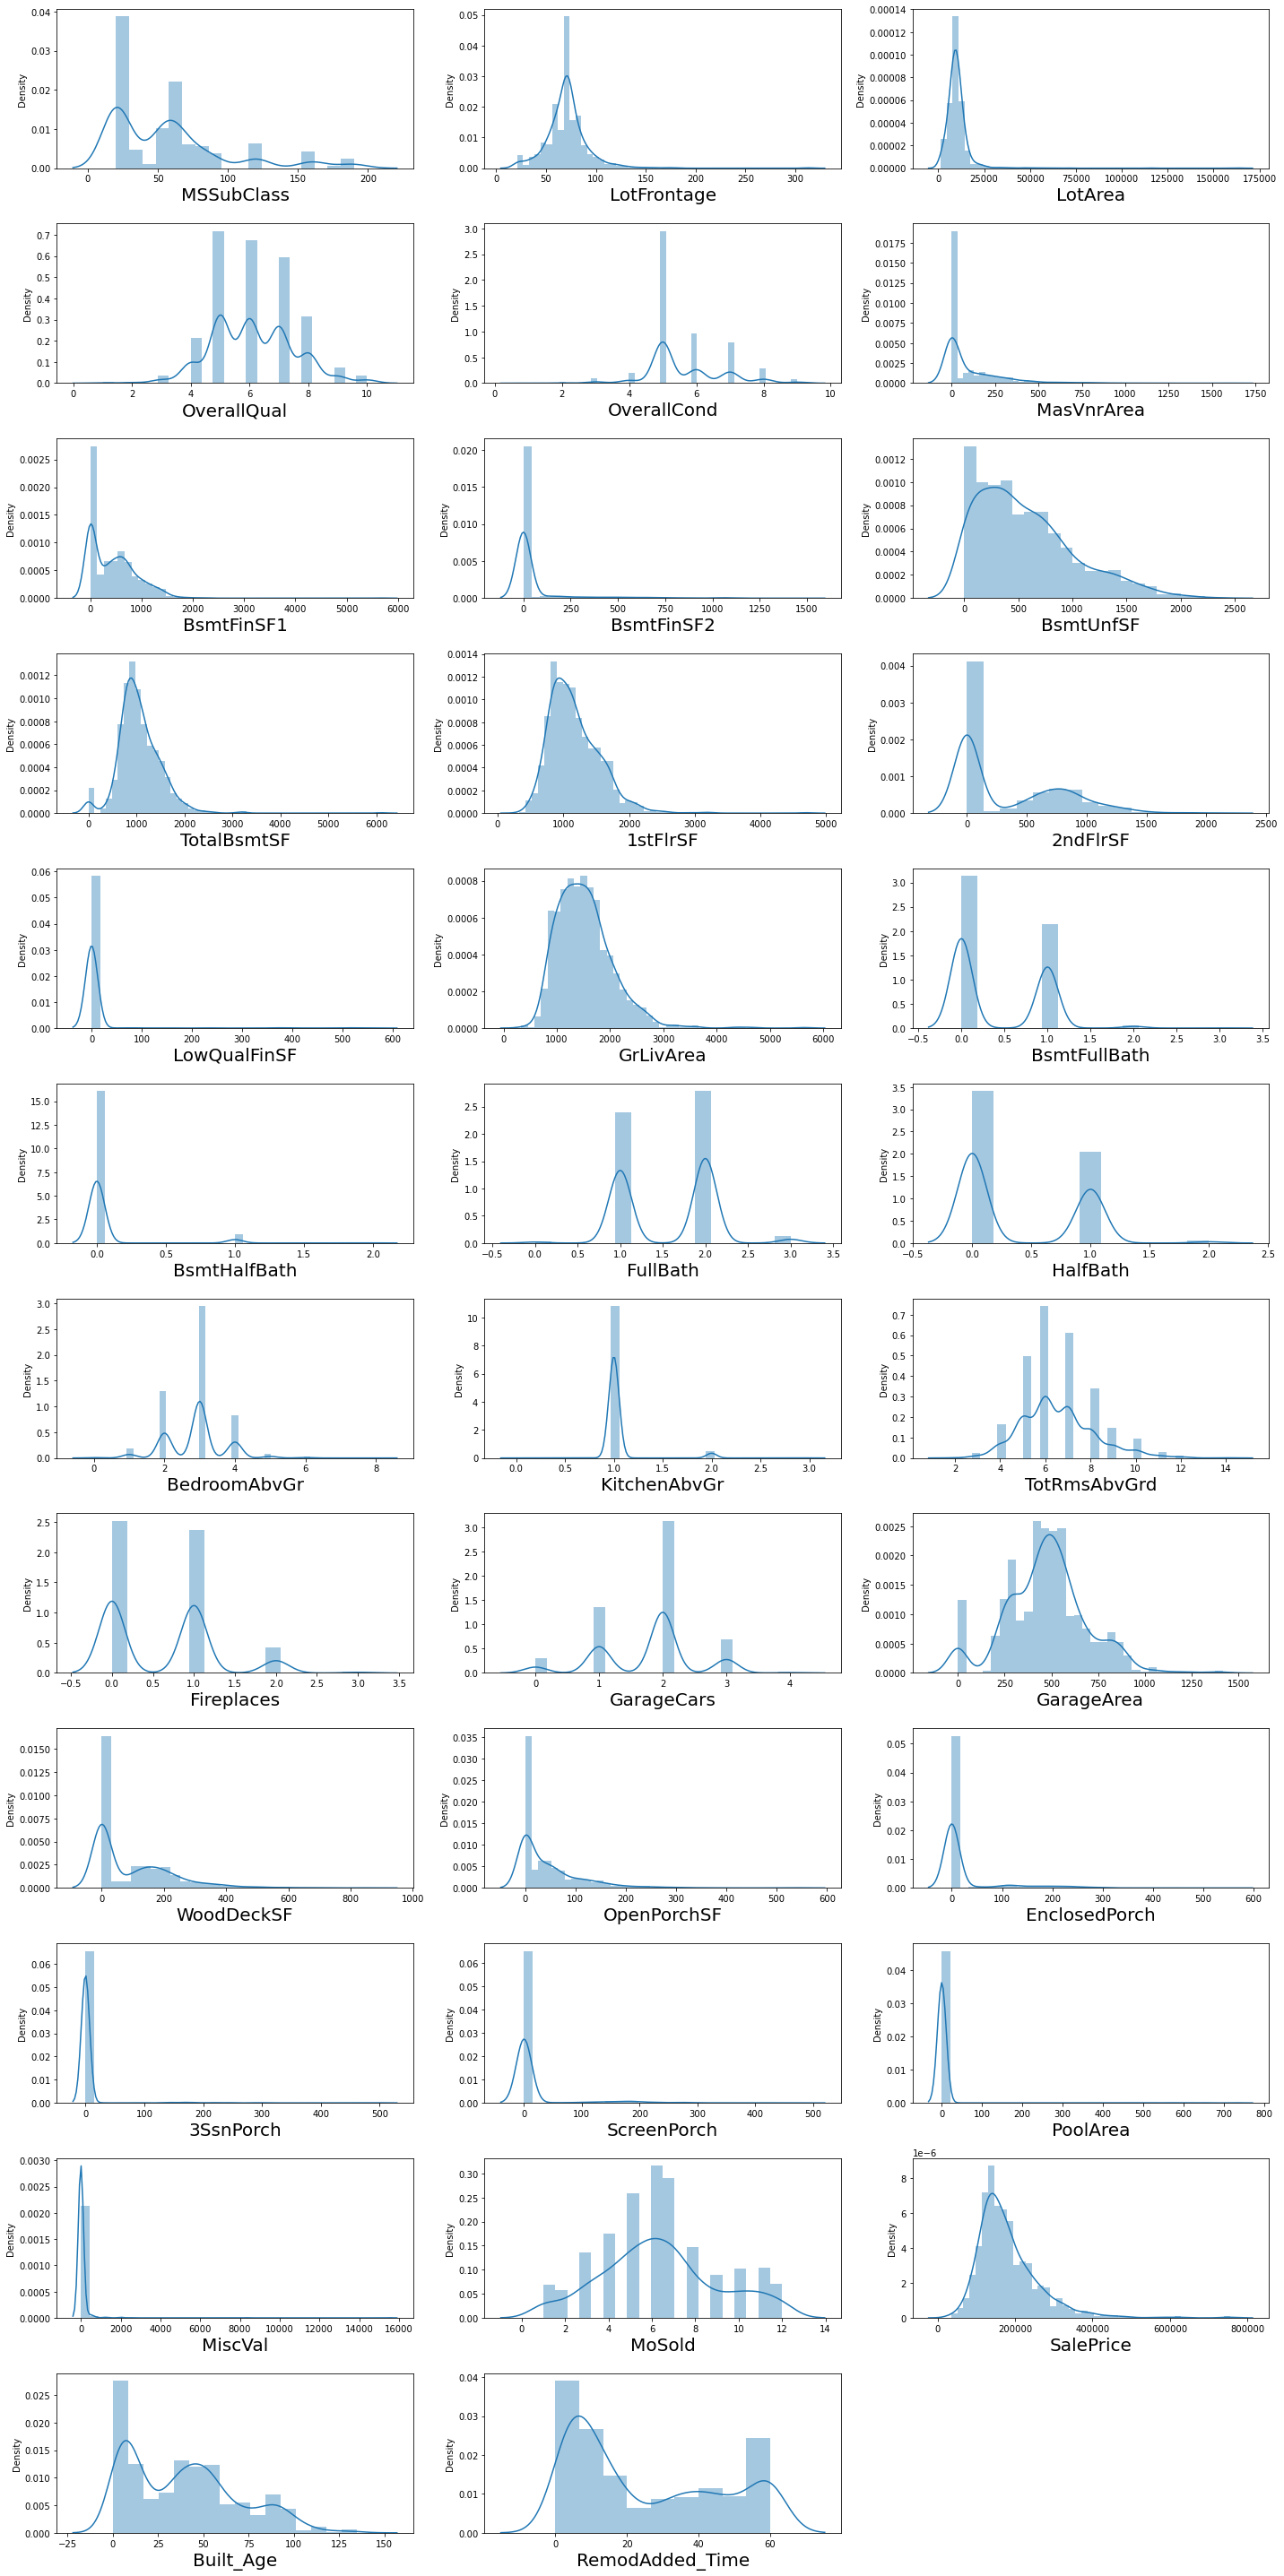

In [30]:
#Distribution plot for all numerical columns
plt.figure(figsize =(20,40))
plotnumber =1
for col in df_num:
    if plotnumber <=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber +=1
plt.tight_layout()

There is skewness in the numerical features, we have to remove it.

In [31]:
df_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [32]:
df_cat1=['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2']

df_cat2 =['BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation']

df_cat3 =['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2']

df_cat4=['Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu']

df_cat5=['GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

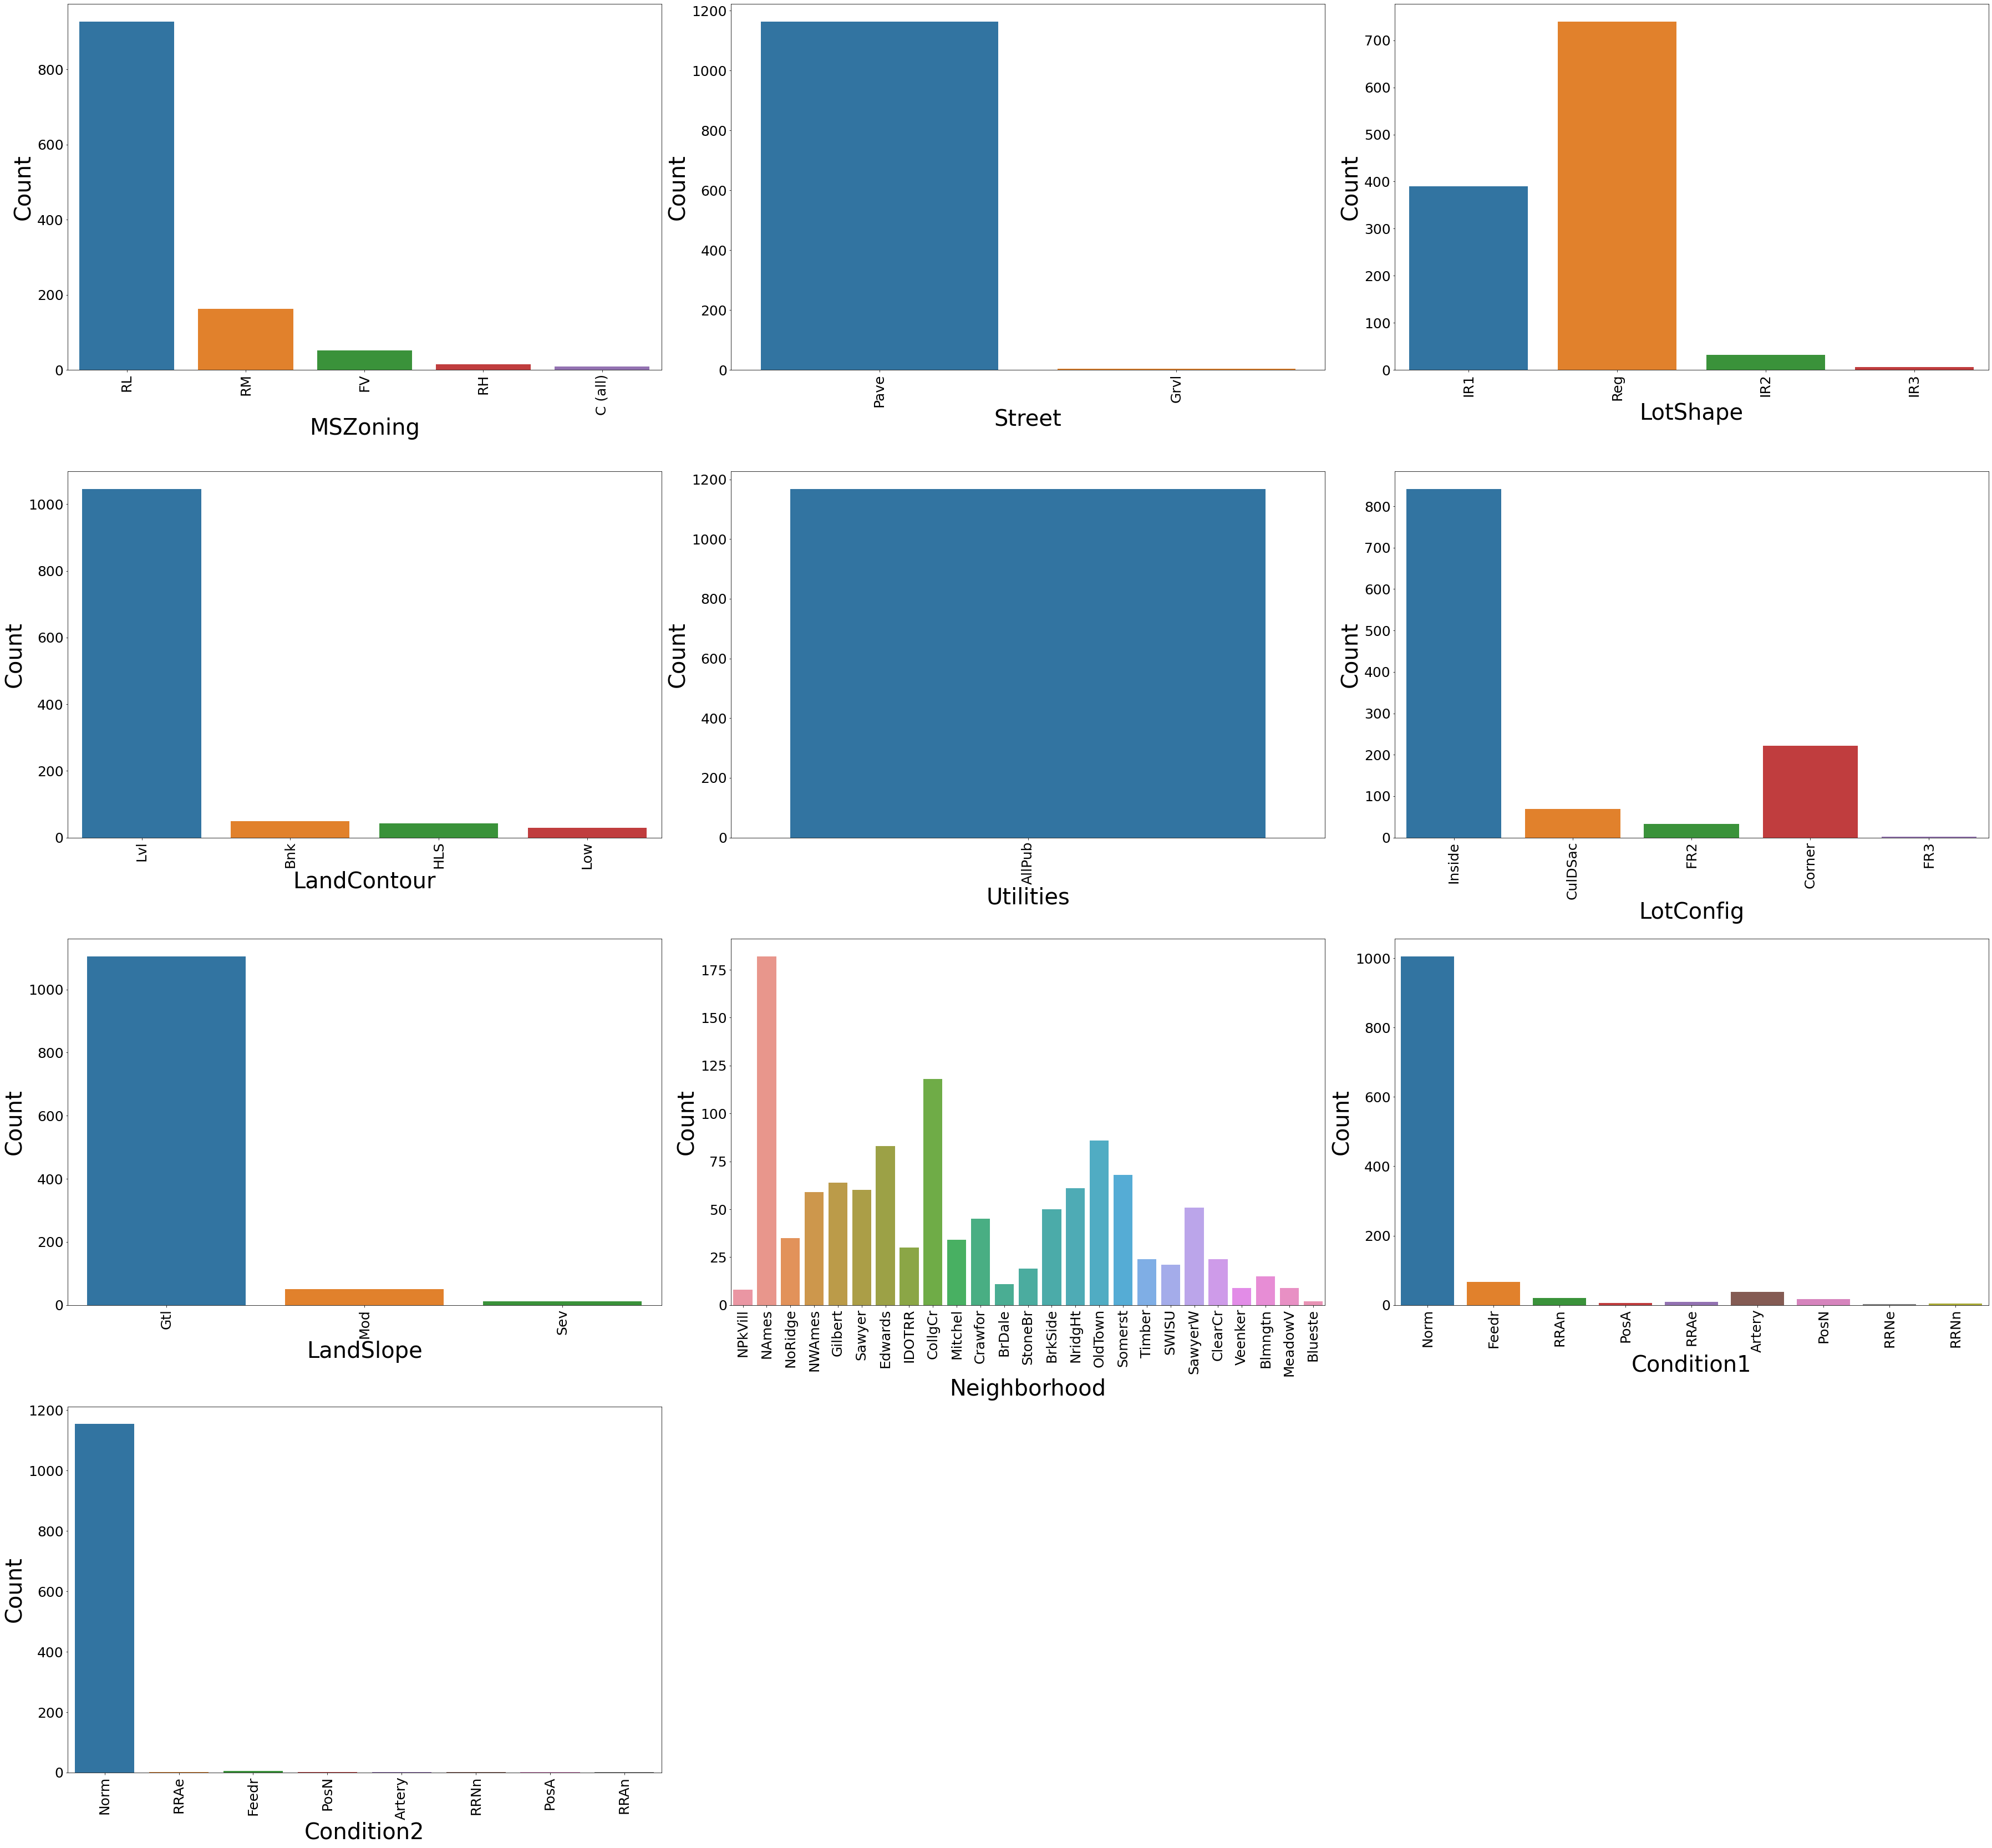

In [33]:
# countplot of all the categorical features
plt.figure(figsize=(50,150))
plotnumber=1
for col in df_cat1:
    if plotnumber <15:
        ax=plt.subplot(13,3,plotnumber)
        sns.countplot(df[col])
        plt.xticks(rotation=90,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
        plt.xlabel(col,fontsize=40)
        plt.ylabel('Count',fontsize=40)
    plotnumber +=1
plt.tight_layout()

Residential with low density zone are much more in counts comapritively others

Most of the property is with paved street very few are Gravel

Regular shaped property is more preferable compared to others. Slightly irregular comes next.

89.6% of property is flat or near flat. 4.3 % at bank, 3.6 % at hillside and remaining are at depression side

All the utilities are public (Electricity, Gas, Water, Septic Tank etc )

Among all available houses 72.1 % are inside lot, 19% are at corner,5.9 % are Cul-de-sac, 2.8 % Frontage on 2 sides of property and very few are Fontage on 3 sides of property

94.6 % slope of the houses are Gentle slop, 4.4 % are moderate and 1 % is with Severe slope

There is higher number of houses in North ames follwed by College Creek,OldTown,Edwards etc. On contrary Bluste has got less count as location followed by NpkVill and Veenker

Considering the proximity of conditions-1 & 2 normal conditions is much higher in count compared to others such as

 (a)Adjacent to arterial street
 (b)Adjacent to feeder street 
 (c)Within 200' of North-South Railroad
 (d)Adjacent to North-South Railroad
 (e)Near positive off-site feature--park, greenbelt, etc.
 (f)Adjacent to postive off-site feature
 (g)Within 200' of East-West Railroad
 (h)Adjacent to East-West Railroad

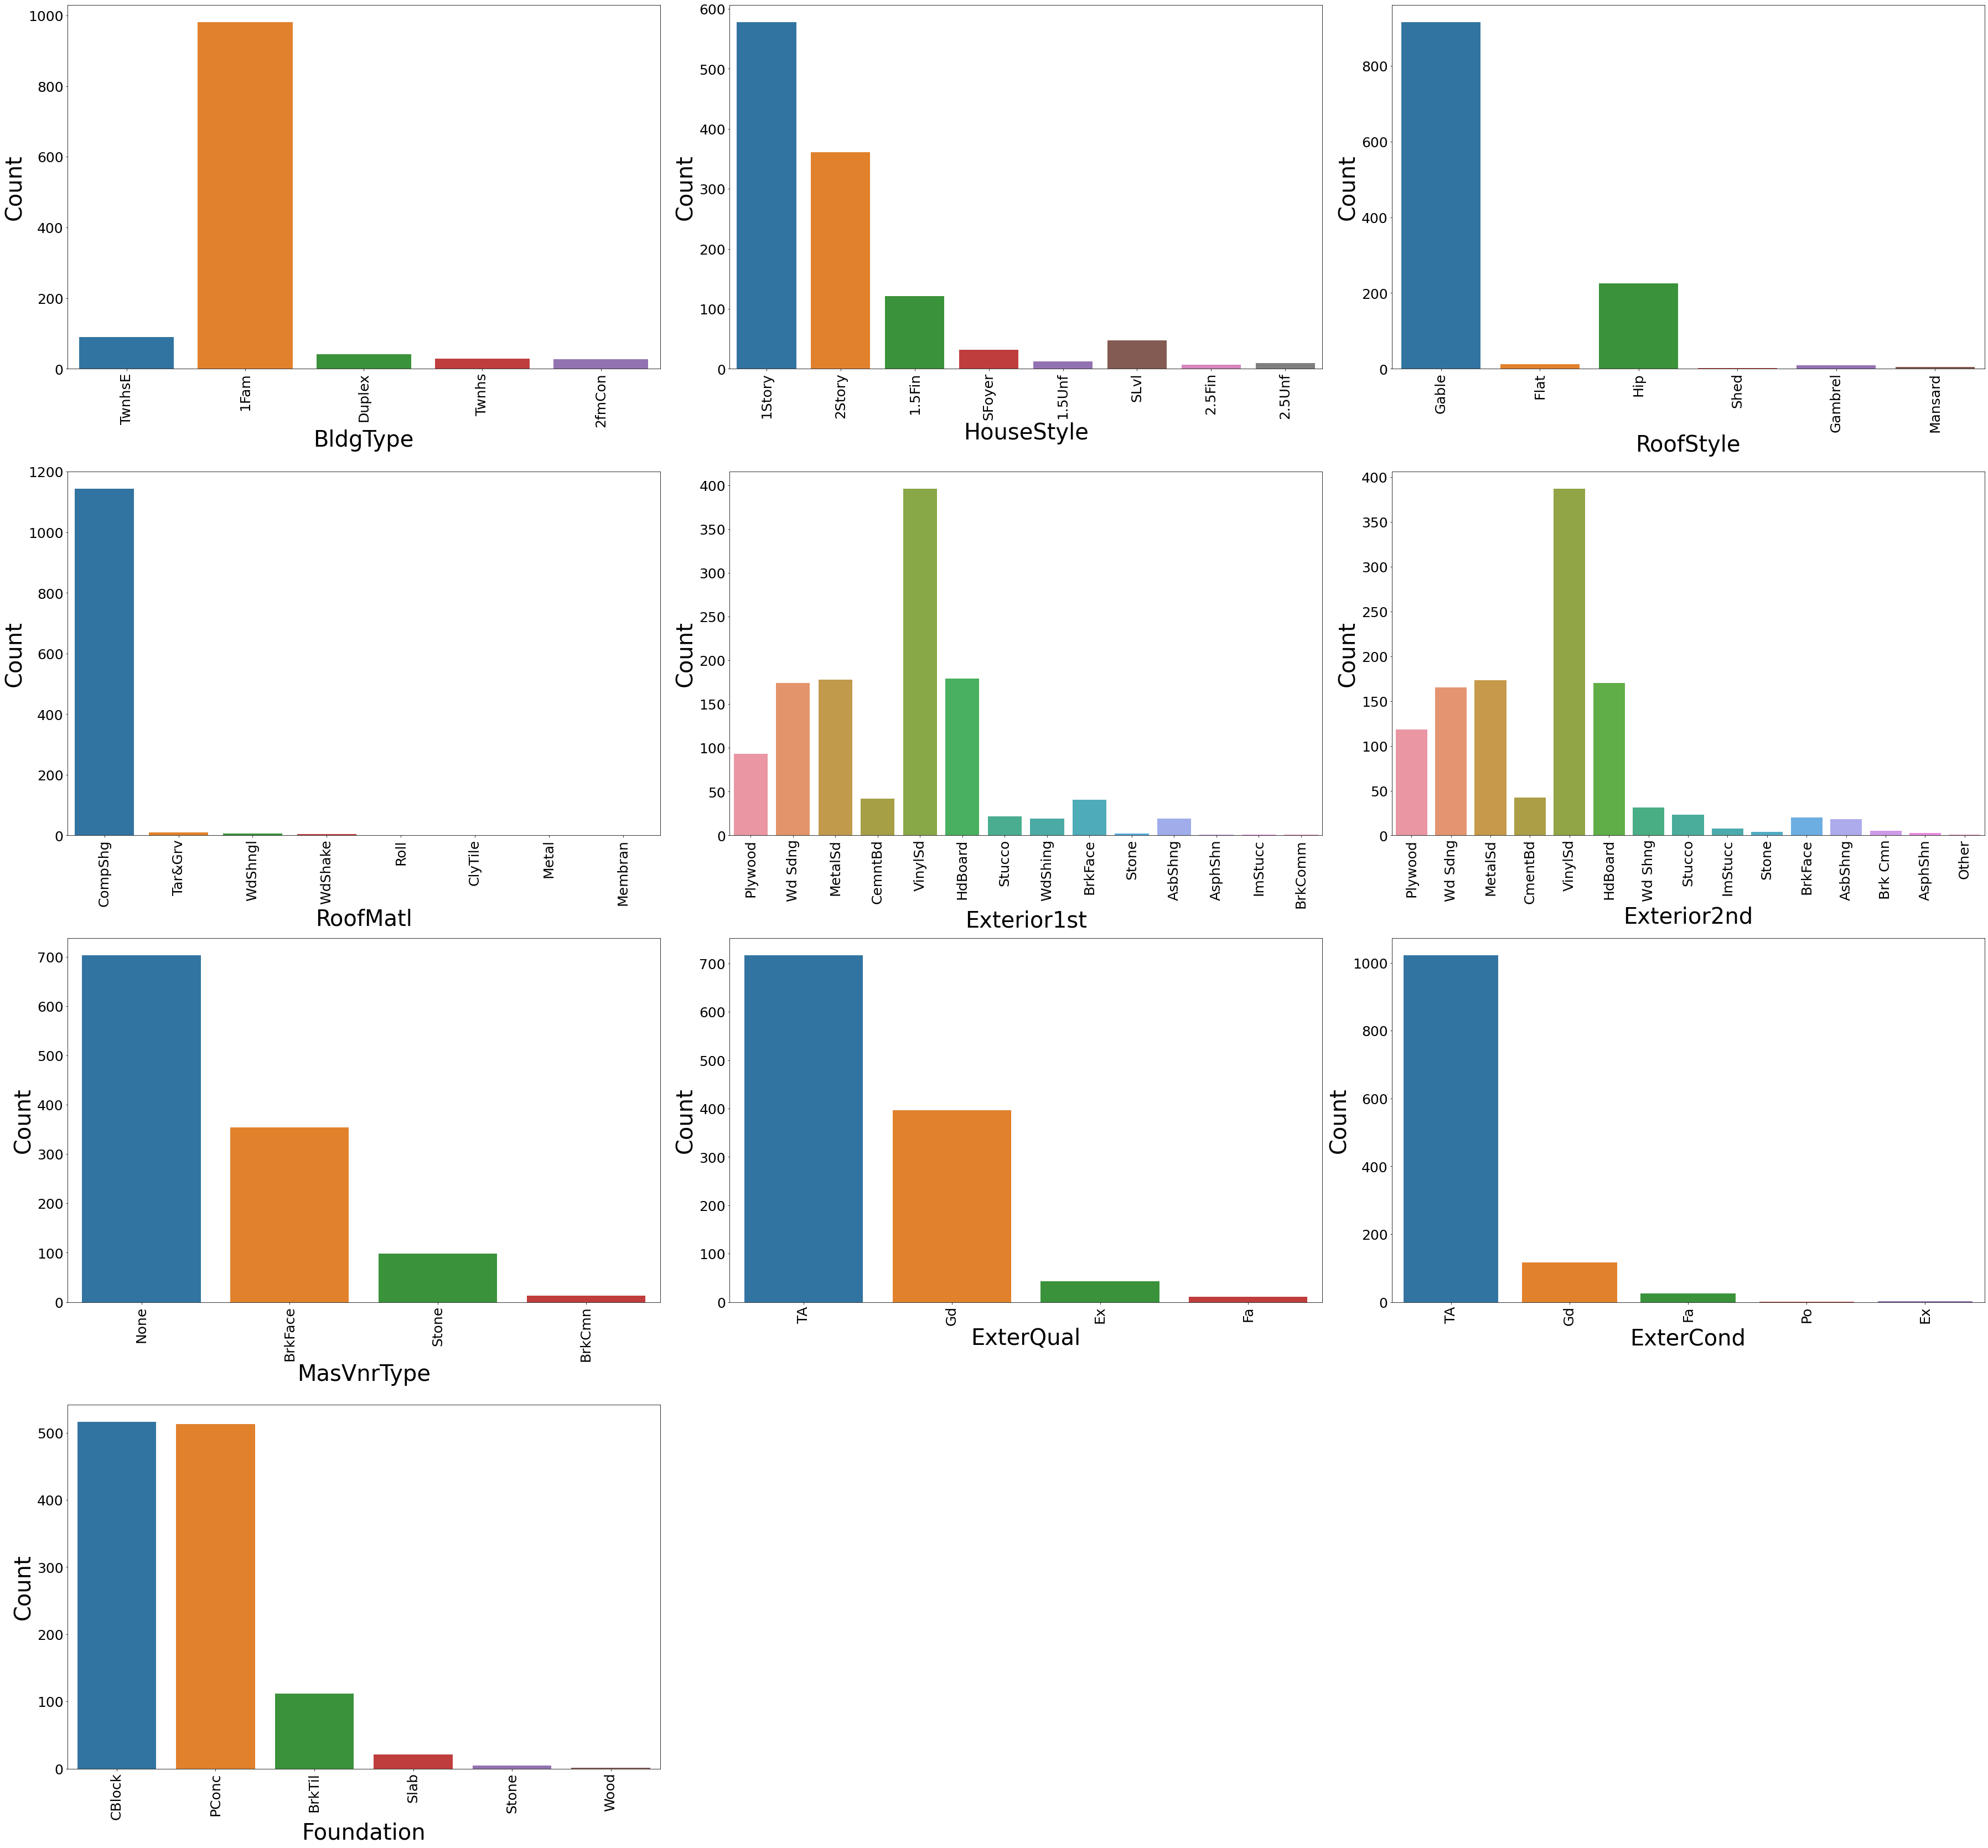

In [34]:
# countplot of all the categorical features
plt.figure(figsize=(50,150))
plotnumber=1
for col in df_cat2:
    if plotnumber <15:
        ax=plt.subplot(13,3,plotnumber)
        sns.countplot(df[col])
        plt.xticks(rotation=90,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
        plt.xlabel(col,fontsize=40)
        plt.ylabel('Count',fontsize=40)
    plotnumber +=1
plt.tight_layout()

84% building are single family type, 7.7 % are Townhouse End Unit

49.5% houses belongs to 1st story and 30.9 % belongs to 2nd story, 10.4% One and one-half story

Maximum of the roofstyle is Gable type and few are Hip style , rest all roof style are very less in count

In case of Standard (Composite) Shingle roof material the count is high for the feature Roof material(RoofMatl).

If exterior 1 and 2 is considered then Vinyl Siding is in higher numbers. HdBoard, MetalSd, Wd Sdng are also in quiet considered.

Masonry veneer type 'None' is choiced 60%, Brick Face is in 30% and stone is 8.4 %

In case of the material on the exterior Average/ Typical is preferred most, Good comes next. Excellent and Fair exterior

Maximum of the houses are in Average/ Typical condition

44.2% houses are based on cinder block foundation, 43.9% based on Poured Contret. Where as only 9.6 % are based on Brick and Tile. Slab,stone and wood foundation are very few in counts.

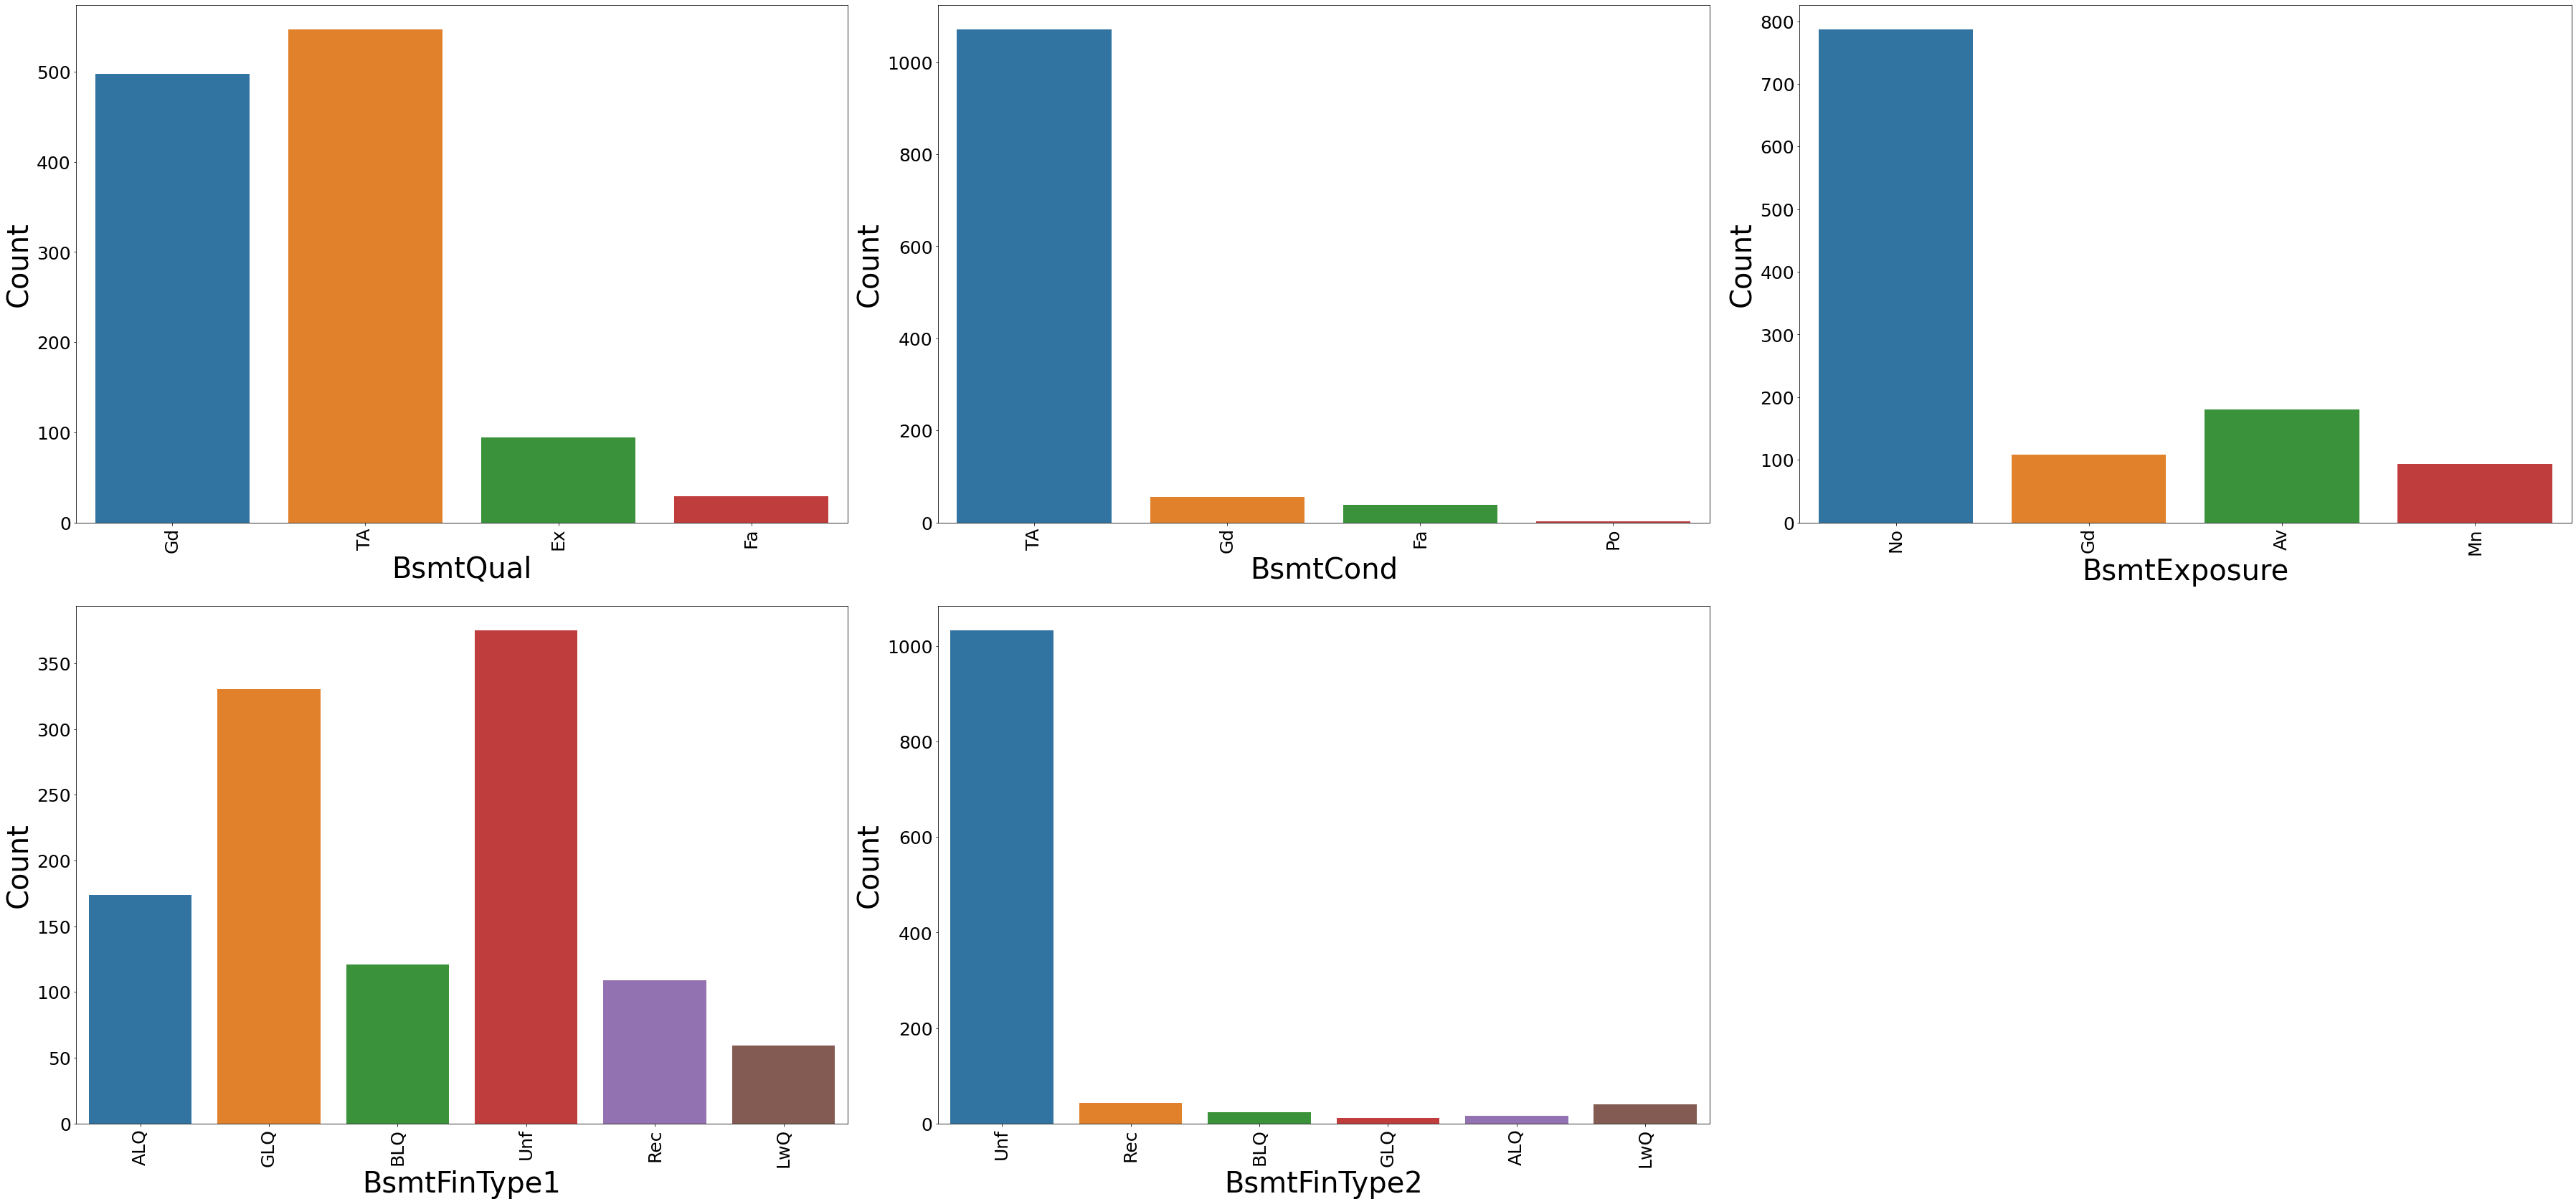

In [35]:
# countplot of all the categorical features
plt.figure(figsize=(50,150))
plotnumber=1
for col in df_cat3:
    if plotnumber <15:
        ax=plt.subplot(13,3,plotnumber)
        sns.countplot(df[col])
        plt.xticks(rotation=90,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
        plt.xlabel(col,fontsize=40)
        plt.ylabel('Count',fontsize=40)
    plotnumber +=1
plt.tight_layout()

Typical (80-89 inches)basement height has span of 46.8% and Good Height (90-99 inches) covers 42.6 %. Excellent p.e. Houses with 100+ inches are 8%

91% basement general condition in Typical

basement with no exposure is most preferable

Result of rating of basement finished area is

(a) 32% say Unfinished

(b) 28.3 % say Good Living Quarters

(c) 14.9 % say Average Living Quaters

(d) 9.3% average rec romm and 5 % low quality

In case of rating of basement finished area( if multiple types ) the Unfinished rating is at maximum

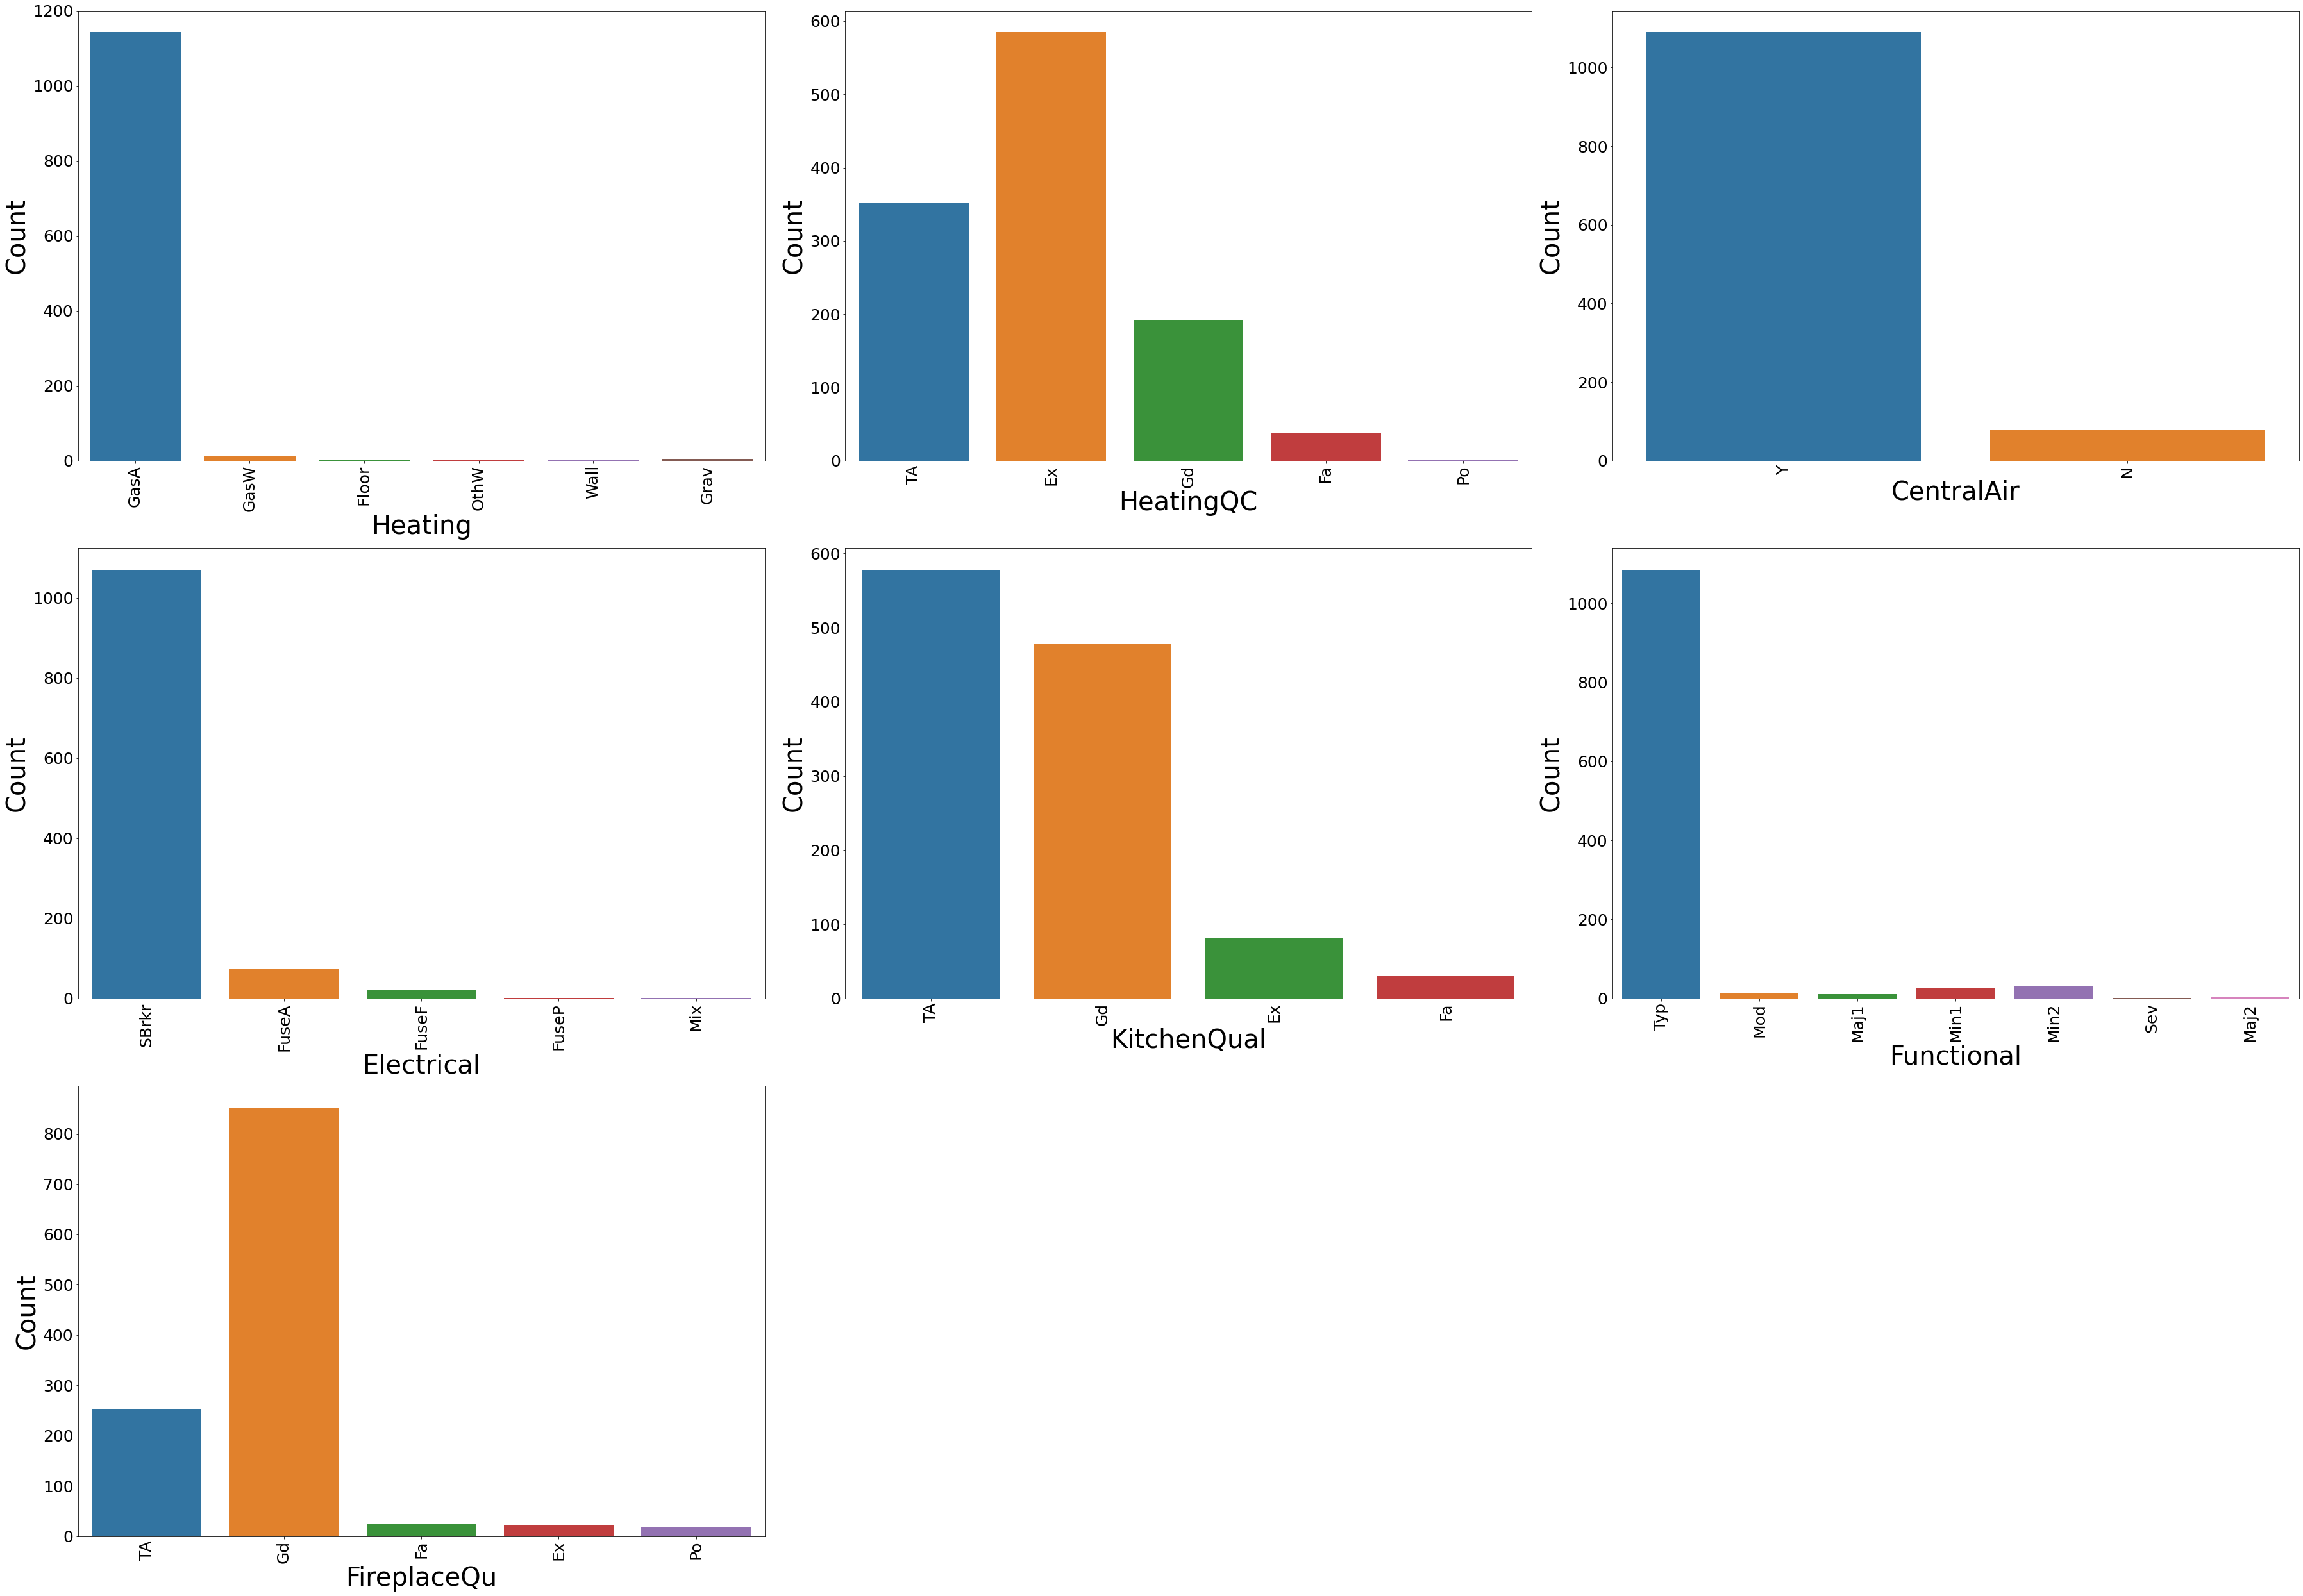

In [36]:
# countplot of all the categorical features
plt.figure(figsize=(50,150))
plotnumber=1
for col in df_cat4:
    if plotnumber <15:
        ax=plt.subplot(13,3,plotnumber)
        sns.countplot(df[col])
        plt.xticks(rotation=90,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
        plt.xlabel(col,fontsize=40)
        plt.ylabel('Count',fontsize=40)
    plotnumber +=1
plt.tight_layout()

Almost all the houses are heated by Gas forces warm fir furnace

Heating quality and condition of 50% houses at excellent and 30% at average

Maximum of the houses are with central air conditioning

Most of houses are fitted with Standard Circuit Breakers and Romex

49.5% of kichen quality is average and 40.9 % are good, only 7% at excellent condition

All most all houses are typical if Home functionality is considered

72.9% fireplace quality is in good condition ,21% are in average, rest are very few

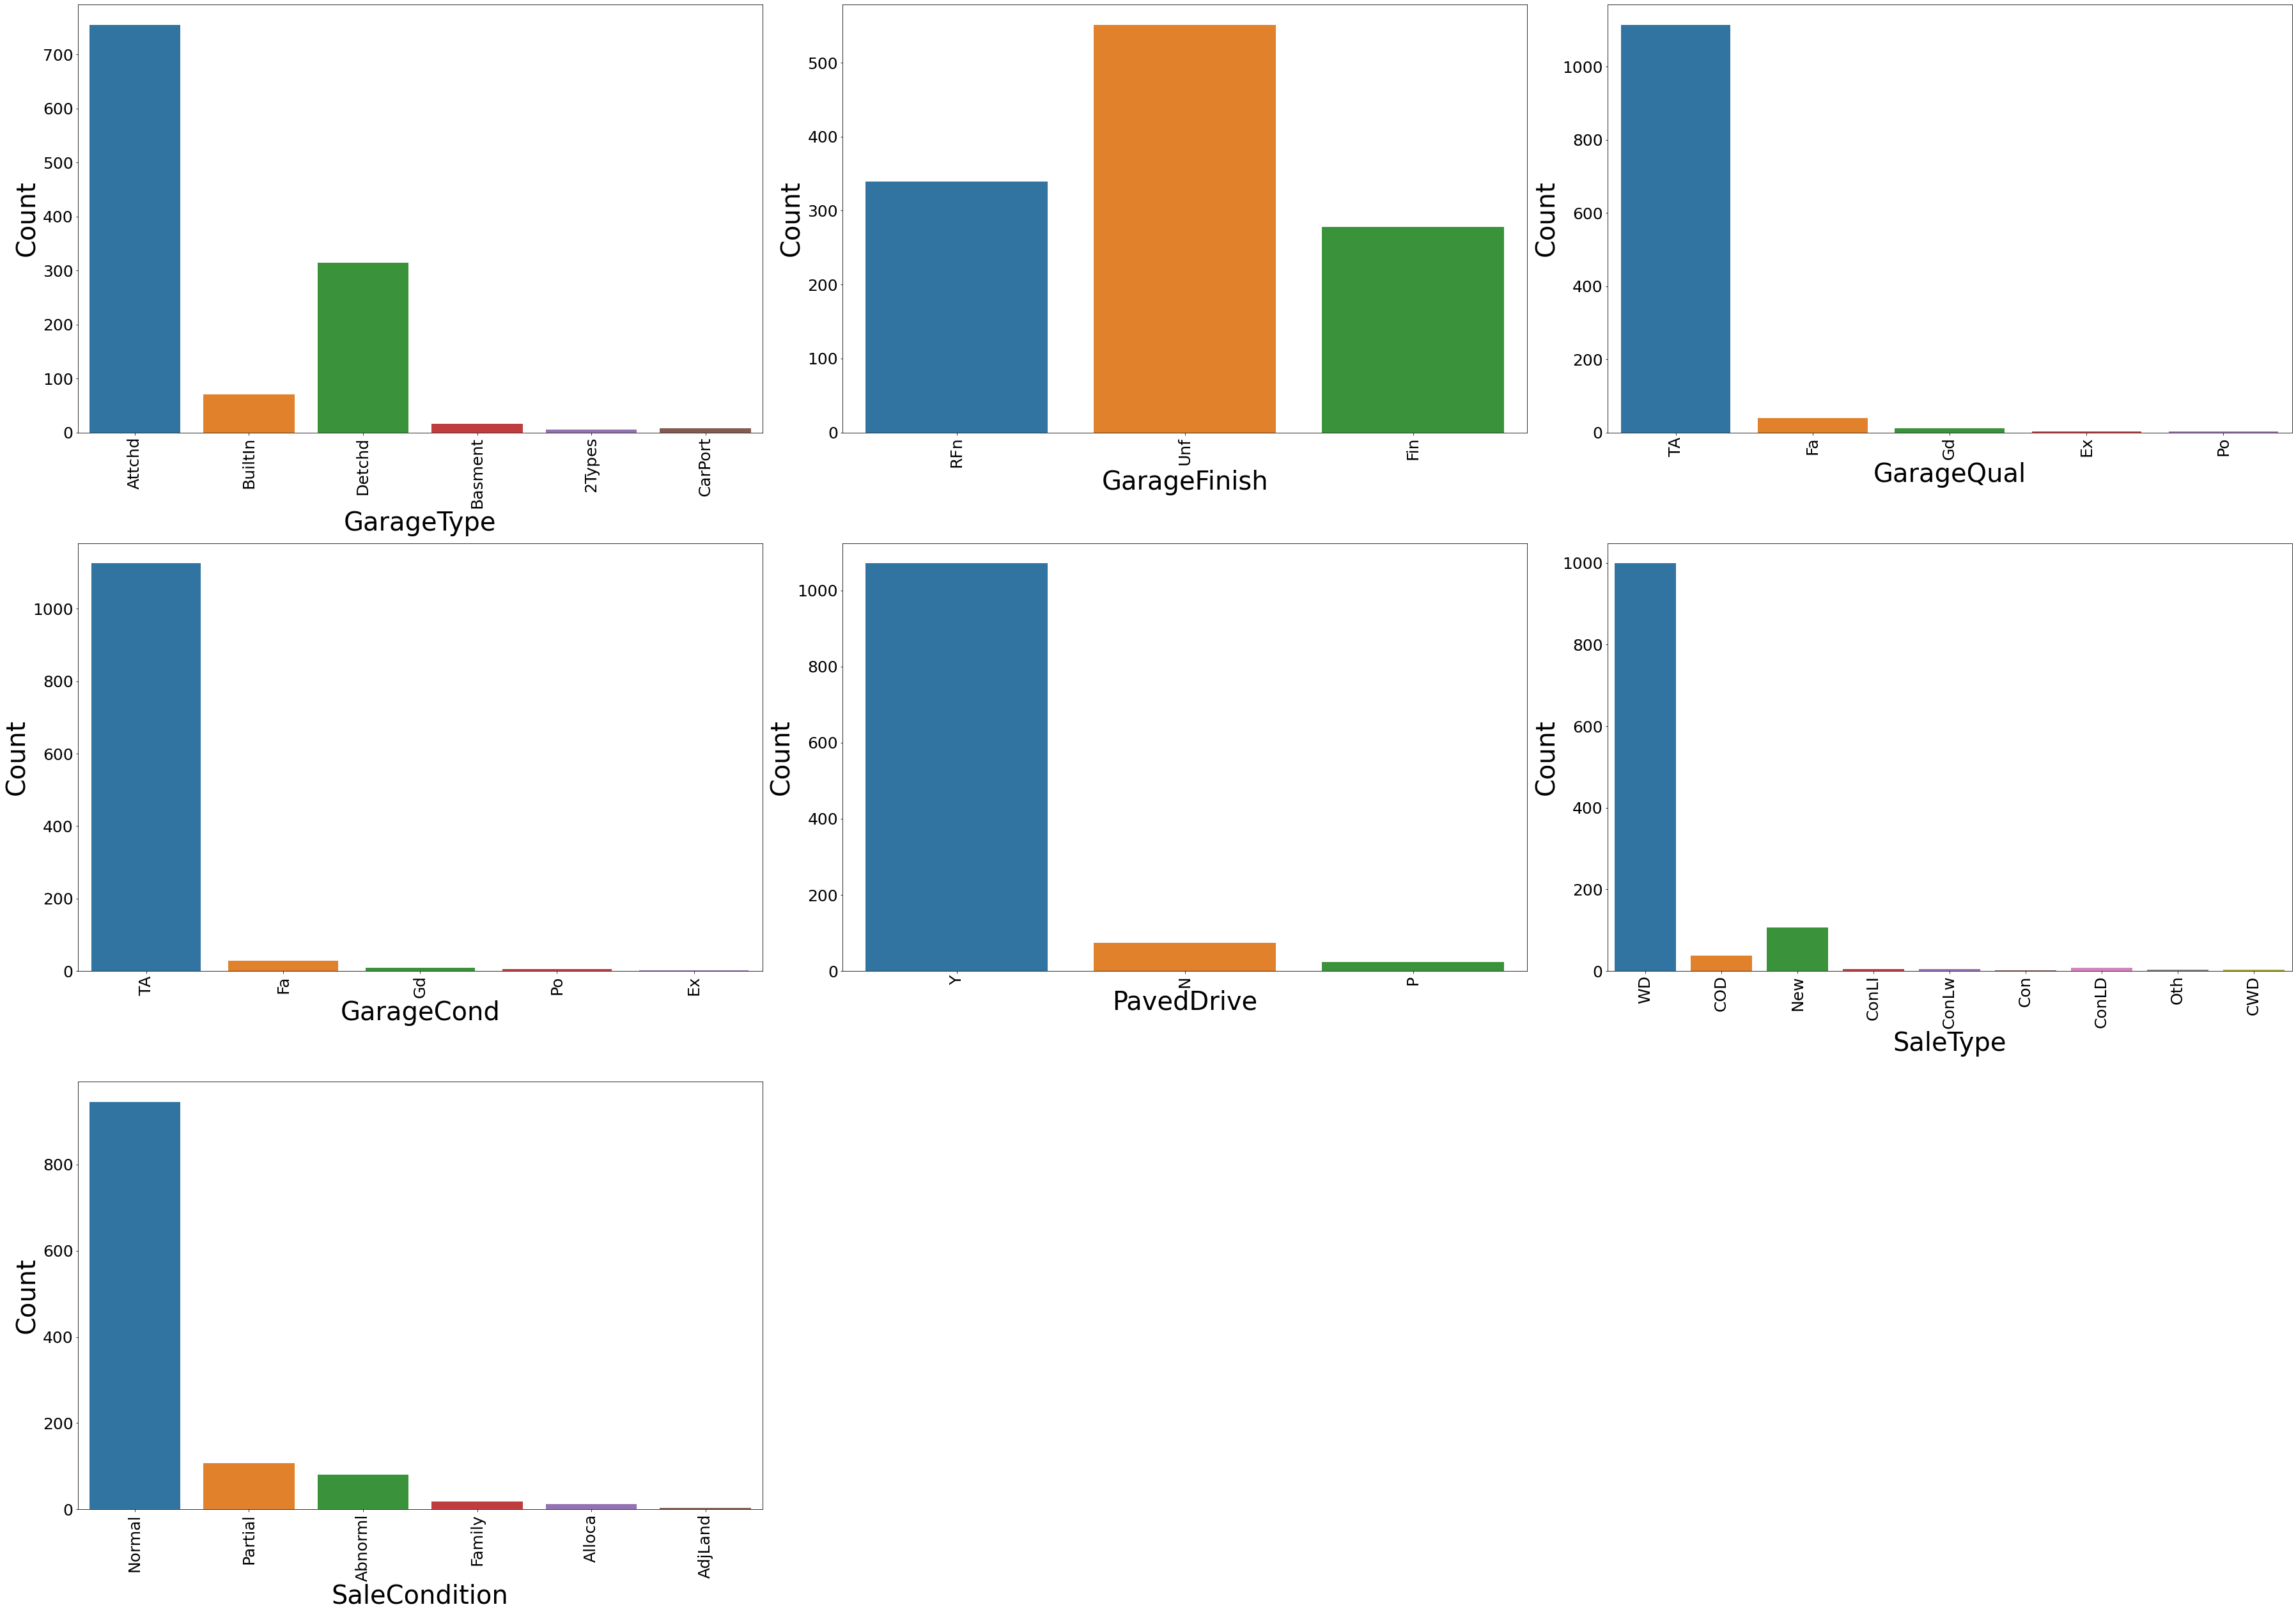

In [37]:
# countplot of all the categorical features
plt.figure(figsize=(50,150))
plotnumber=1
for col in df_cat5:
    if plotnumber <15:
        ax=plt.subplot(13,3,plotnumber)
        sns.countplot(df[col])
        plt.xticks(rotation=90,fontsize=25)
        plt.yticks(rotation=0,fontsize=25)
        plt.xlabel(col,fontsize=40)
        plt.ylabel('Count',fontsize=40)
    plotnumber +=1
plt.tight_layout()

64.6% are attached garage and 26.9% houses are with detached garagre. Where as 6% is builtin.

47% garage are in unfinished condition,29% are Roughly finished and 23% are finished

Most of the Garage quality is of average quality

Also most of the Garage quality is of average quality

47% garage are in unfinished condition, 29% are Roughly finished and 23% are finished

Most of the houses are with paved driveway, few are Dirt/ Gravel

Maximimum type of house sale is Warranty Deed - conventional

Also the conditio of house sale has been normal

<AxesSubplot:xlabel='SaleType', ylabel='count'>

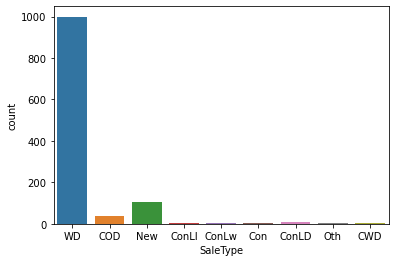

In [38]:
sns.countplot(data=df,x='SaleType')

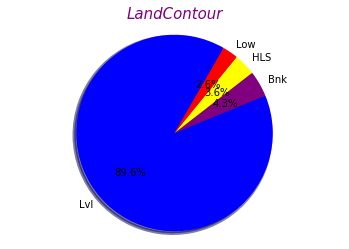

In [39]:
#df['LandContour'].value_counts()
plt.pie(x=df['LandContour'].value_counts(),labels=df['LandContour'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['blue','purple','yellow','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('LandContour',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

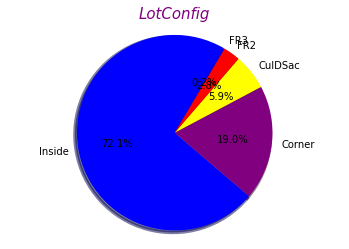

In [40]:
plt.pie(x=df['LotConfig'].value_counts(),labels=df['LotConfig'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['blue','purple','yellow','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('LotConfig',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

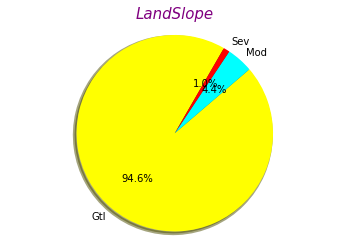

In [41]:
plt.pie(x=df['LandSlope'].value_counts(),labels=df['LandSlope'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['yellow','cyan','red','purple'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('LandSlope',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

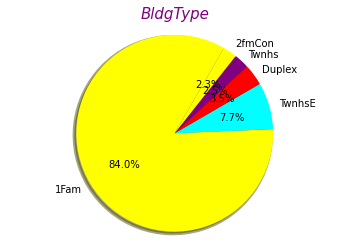

In [42]:
plt.pie(x=df['BldgType'].value_counts(),labels=df['BldgType'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['yellow','cyan','red','purple'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('BldgType',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

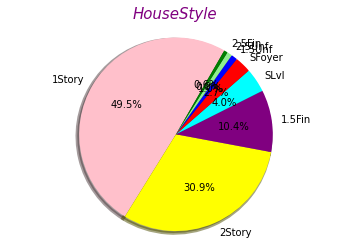

In [43]:
plt.pie(x=df['HouseStyle'].value_counts(),labels=df['HouseStyle'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['pink','yellow','purple','cyan','red','blue','lightgreen','green'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('HouseStyle',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

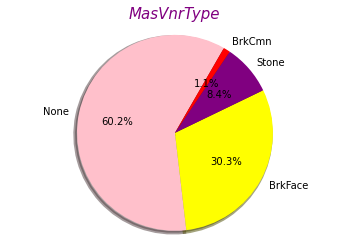

In [44]:
plt.pie(x=df['MasVnrType'].value_counts(),labels=df['MasVnrType'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['pink','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('MasVnrType',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

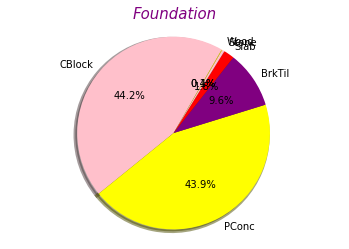

In [45]:
plt.pie(x=df['Foundation'].value_counts(),labels=df['Foundation'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['pink','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Foundation',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

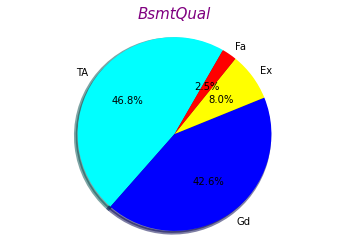

In [46]:
plt.pie(x=df['BsmtQual'].value_counts(),labels=df['BsmtQual'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['cyan','blue','yellow','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('BsmtQual',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

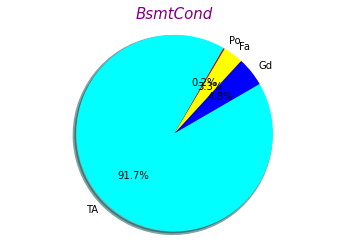

In [47]:
plt.pie(x=df['BsmtCond'].value_counts(),labels=df['BsmtCond'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['cyan','blue','yellow','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('BsmtCond',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

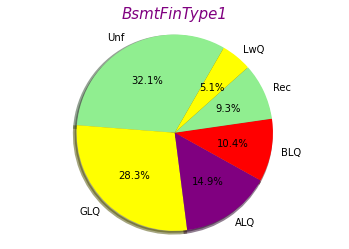

In [48]:
plt.pie(x=df['BsmtFinType1'].value_counts(),labels=df['BsmtFinType1'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('BsmtFinType1',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

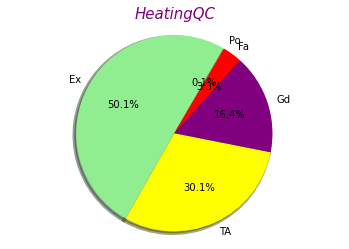

In [49]:
plt.pie(x=df['HeatingQC'].value_counts(),labels=df['HeatingQC'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('HeatingQC',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

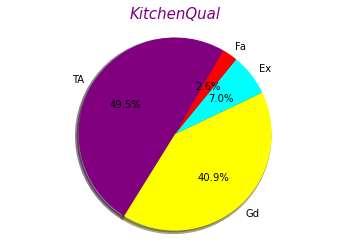

In [50]:
plt.pie(x=df['KitchenQual'].value_counts(),labels=df['KitchenQual'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['purple','yellow','cyan','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('KitchenQual',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

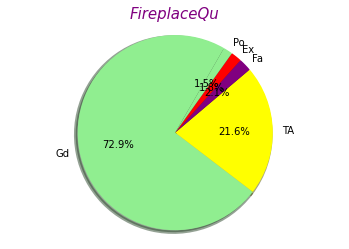

In [51]:
plt.pie(x=df['FireplaceQu'].value_counts(),labels=df['FireplaceQu'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('FireplaceQu',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

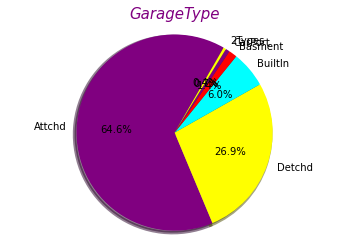

In [52]:
plt.pie(x=df['GarageType'].value_counts(),labels=df['GarageType'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['purple','yellow','cyan','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('GarageType',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

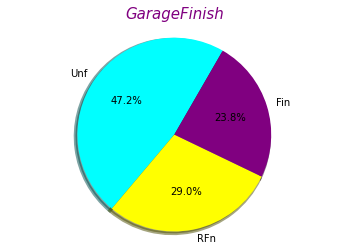

In [53]:
plt.pie(x=df['GarageFinish'].value_counts(),labels=df['GarageFinish'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['cyan','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('GarageFinish',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

In [54]:
df_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'Built_Age',
 'RemodAdded_Time',
 'Sold_Time',
 'Garage_Age']

In [55]:
df['LotFrontage'].value_counts()

70.98847     214
60.00000     111
80.00000      60
70.00000      58
75.00000      46
            ... 
128.00000      1
152.00000      1
149.00000      1
112.00000      1
153.00000      1
Name: LotFrontage, Length: 107, dtype: int64

In [56]:
# Features with discreate numerical values
col_disc=col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Sold_Time']

# features with continuous values
col_cont=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Built_Age','RemodAdded_Time','Garage_Age']

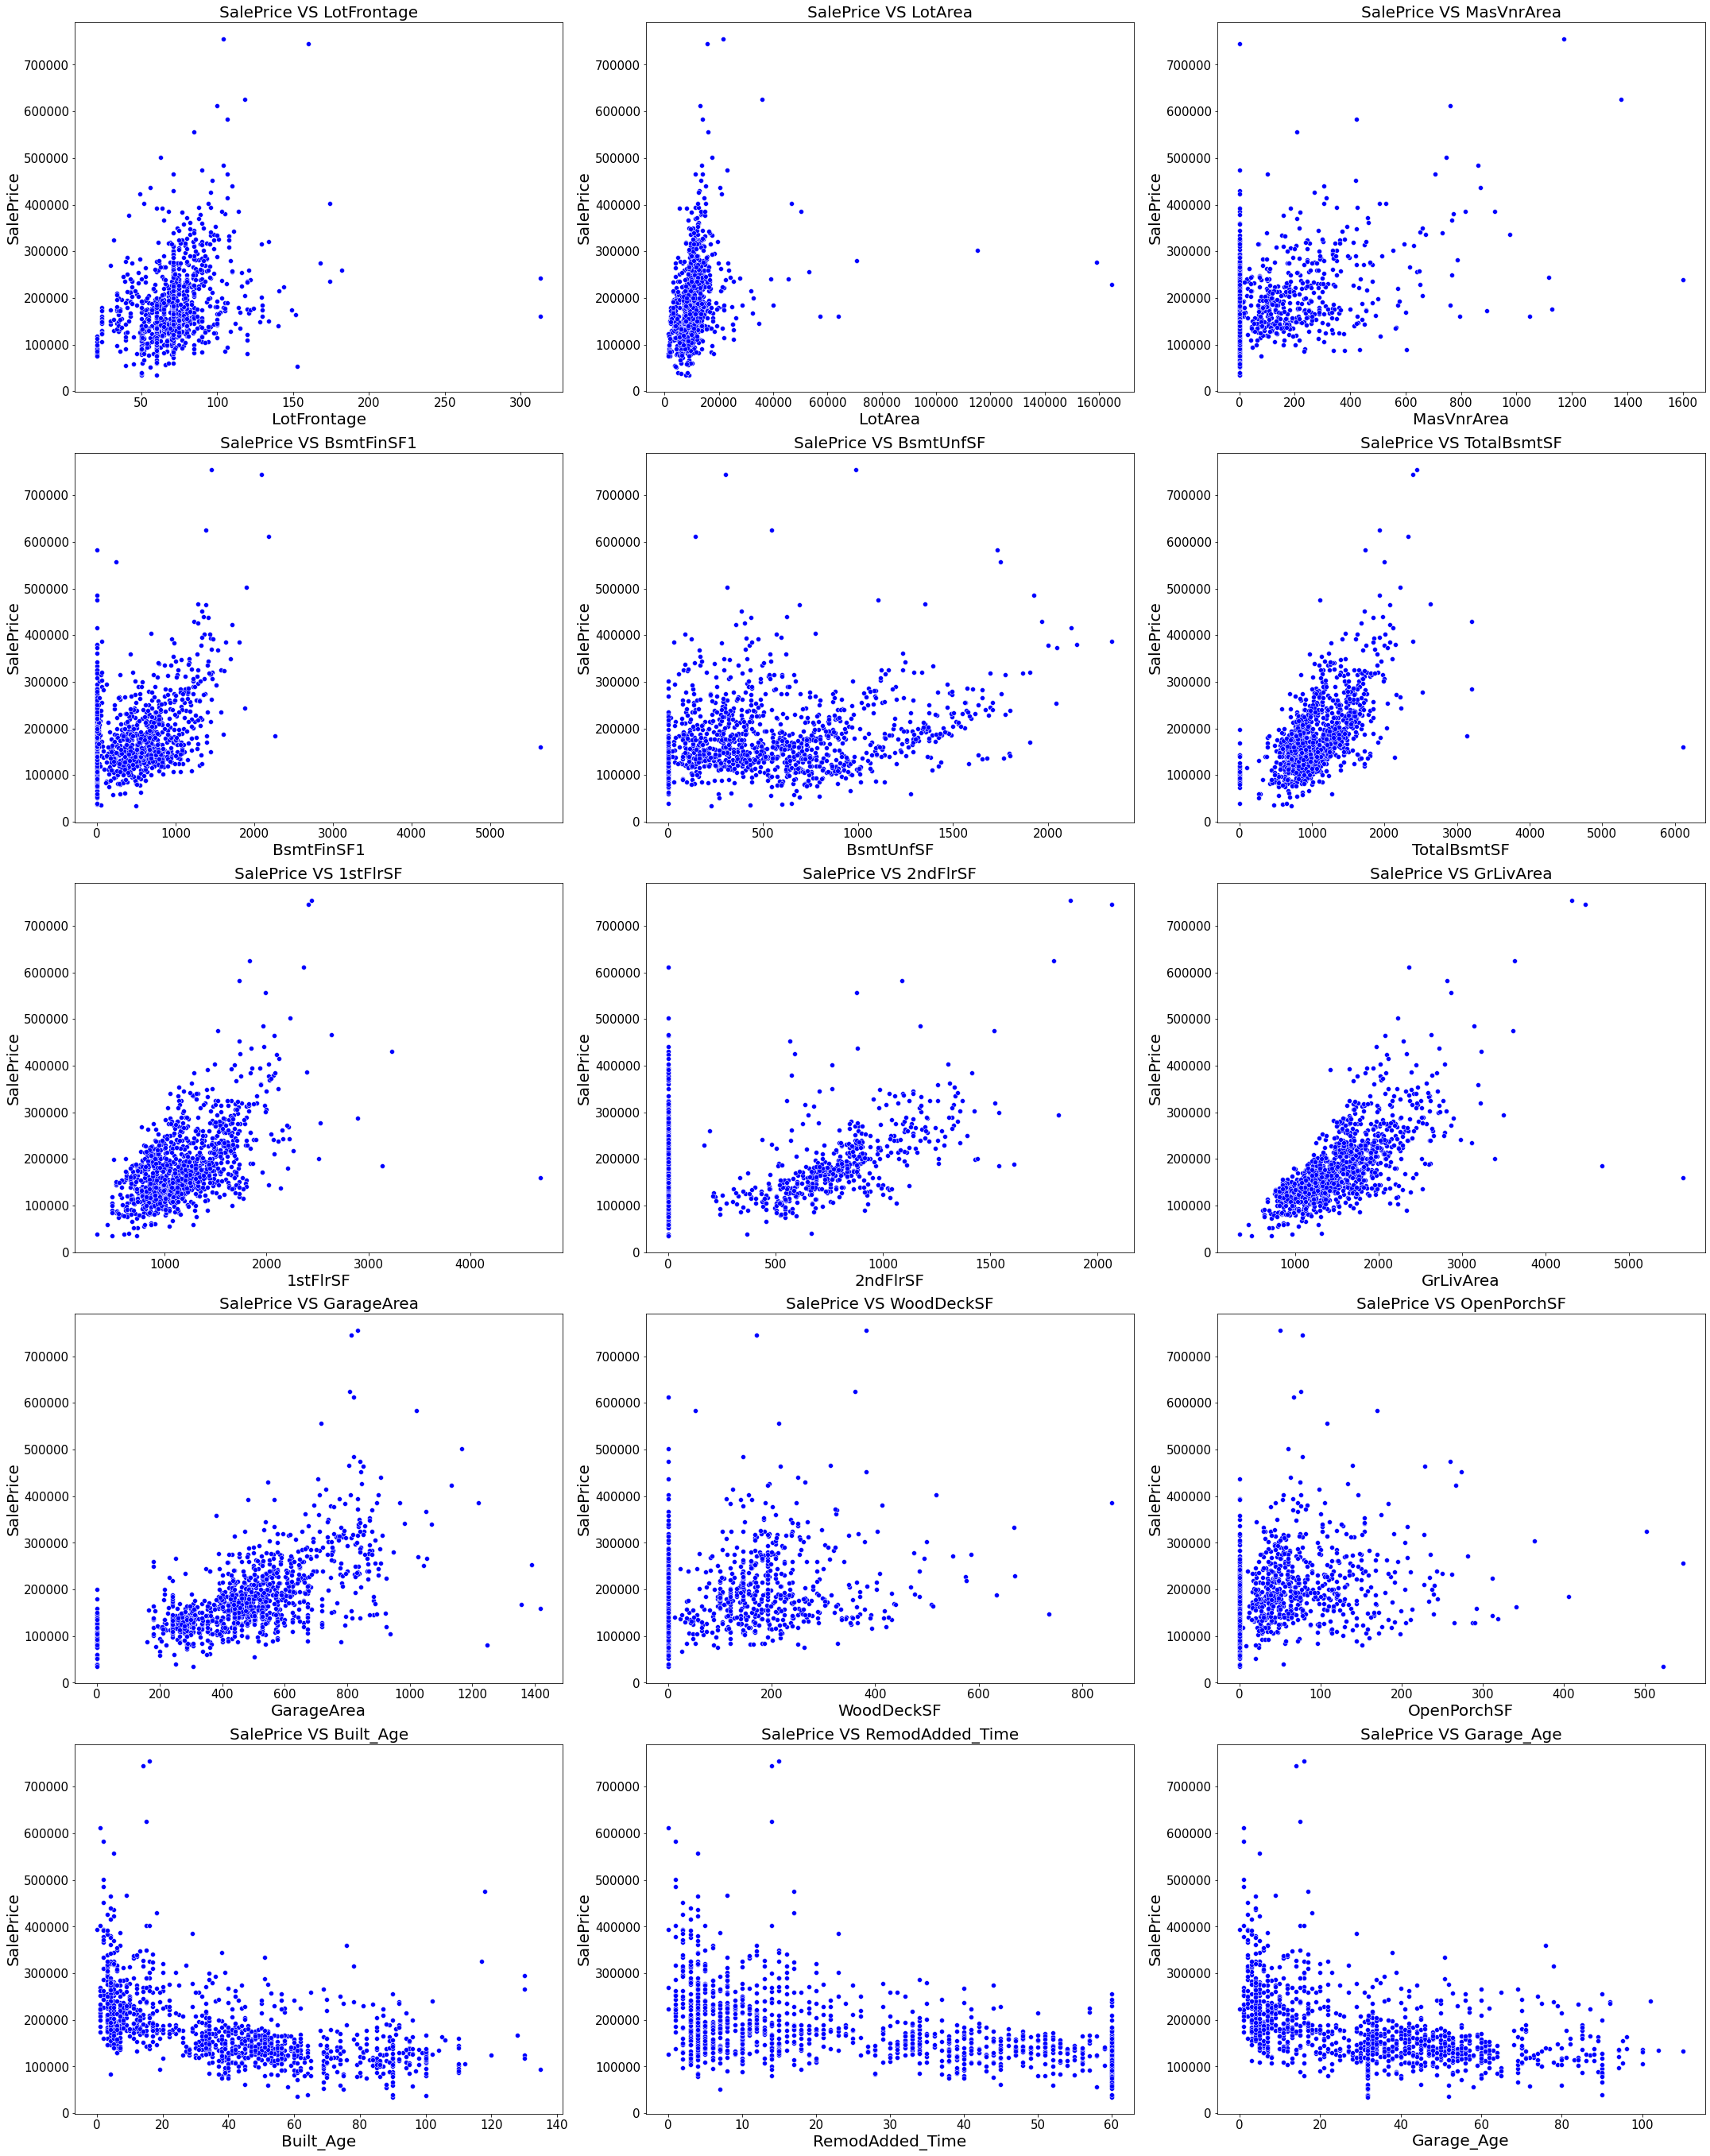

In [57]:
# scatterplot for continuous values features
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(col_cont)):
    if plotnumber <25:
        plt.subplot(20,3,plotnumber)
        sns.scatterplot(x=df[col_cont[i]],y=df['SalePrice'],color='b')
        plt.title(f"SalePrice VS {col_cont[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(col_cont[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

With the increasing lavel of Linear feet of street connected to property(LotFrontage) the Sale price decreasing

As Lot size in square feet(LotArea) has increseing sale price has decreasing

with increased Masonry veneer area in square feet(MasVnrArea)the saleprice has decreased

Type 1 finished square feet(BsmtFinSF1) is positively corelated with sales price.

Saleprice has decreased with the increased Unfinished square feet of basement area(BsmtUnfSF)

Total square feet of basement area(TotalBsmtSF) is positively correlated with saleprice

As First Floor square feet(1stFlrSF) is incresed the sale price has increased.

SalePrice has decreased as the Second floor square feet(2ndFlrSF) has increased.

Grade (ground) living area square feet(GrLivArea) is positively correlated with saleprice.

As Size of garage in square feet(GarageArea) has incresed the sale price also has increased.

There is no significant impact of Wood deck area in square feet(WoodDeckSF) in saleprice.

There is no significant impact of Open porch area in square feet(OpenPorchSF) in saleprice

Old built houses has less sale price

Since Remodel date (same as construction date if no remodeling or additions)(Year_SinceRemodAdded)negetively correlated wtih saleprice

Garage age is also negetively correlated with sale price

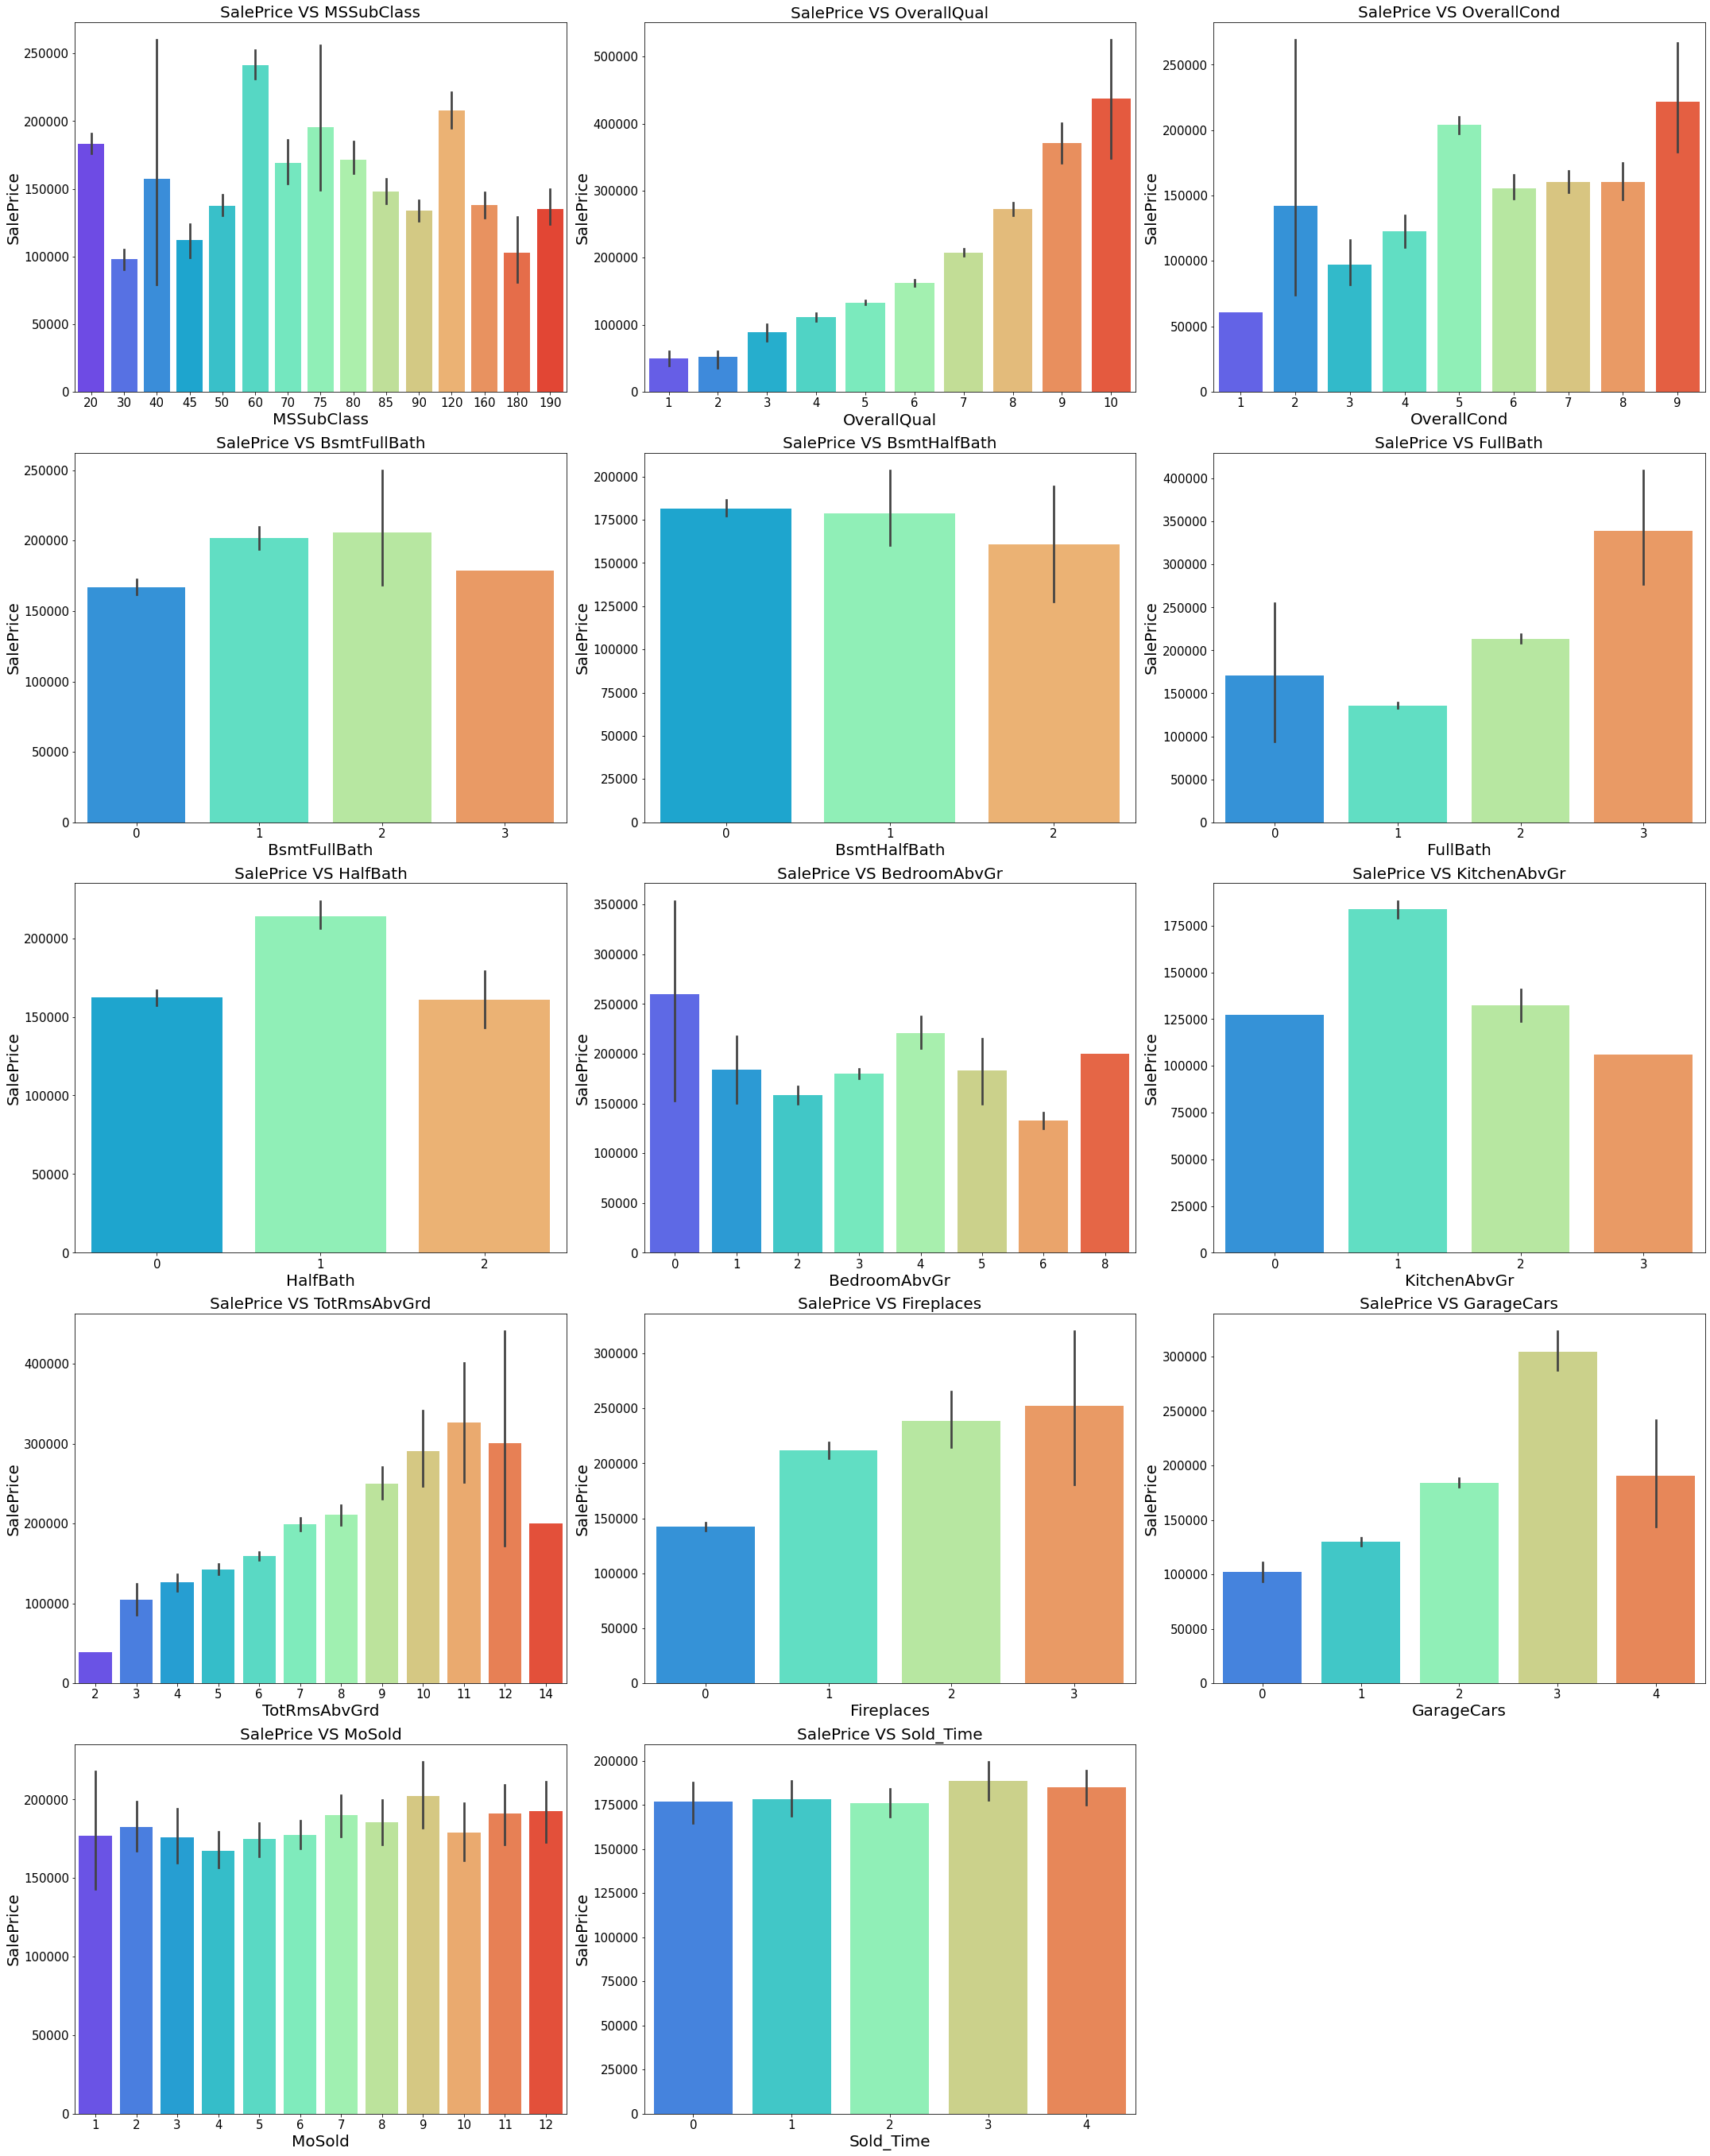

In [58]:
# barplot for continuous values features
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(col_disc)):
    if plotnumber <25:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[col_disc[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {col_disc[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(col_disc[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

- For 1-STORY 1946 & NEWER ALL STYLES(20) and 2-STORY 1946 & NEWER(60) types of dwelling(MSSuubClass) the saleprice is higher.

- The houses with high ratings in the overall material and finish of the house(OverallQual) has higher saleprice.

- Houses with rating 5(Average) in overall condition of the house(OverallCond) has higher sale price.

- Houses with o Basement Half Bath has higher sale price

- Houses which has 4 Full Bath has very higher price

- In case of half bathroom houses with 1 half bath room has higher price

- For 2, 3 and 4 Bedrooms above grade (does NOT include basement bedrooms)(BedroomAbvGr) the sales as well as SalePrice is high.
- For 1 Kitchens above grade(KitchenAbvGr) the sales as well as SalePrice is high.
- For 4-9 Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd) the sales as well as SalePrice is high.
- For 0 and 1 Number of fireplaces(Fireplaces) the sales as well as SalePrice is high.
- For 1 and 2 Size of garage in car capacity(GarageCars) the sales is high and for 3 Size of garage in car capacity(GarageCars) the SalePrice is high.
- In between April to August for Month Sold(MoSold) the sales is good with SalePrice.
- Year_SinceSold has no significant impcat on sale

# Bivariate analysis for categorical features

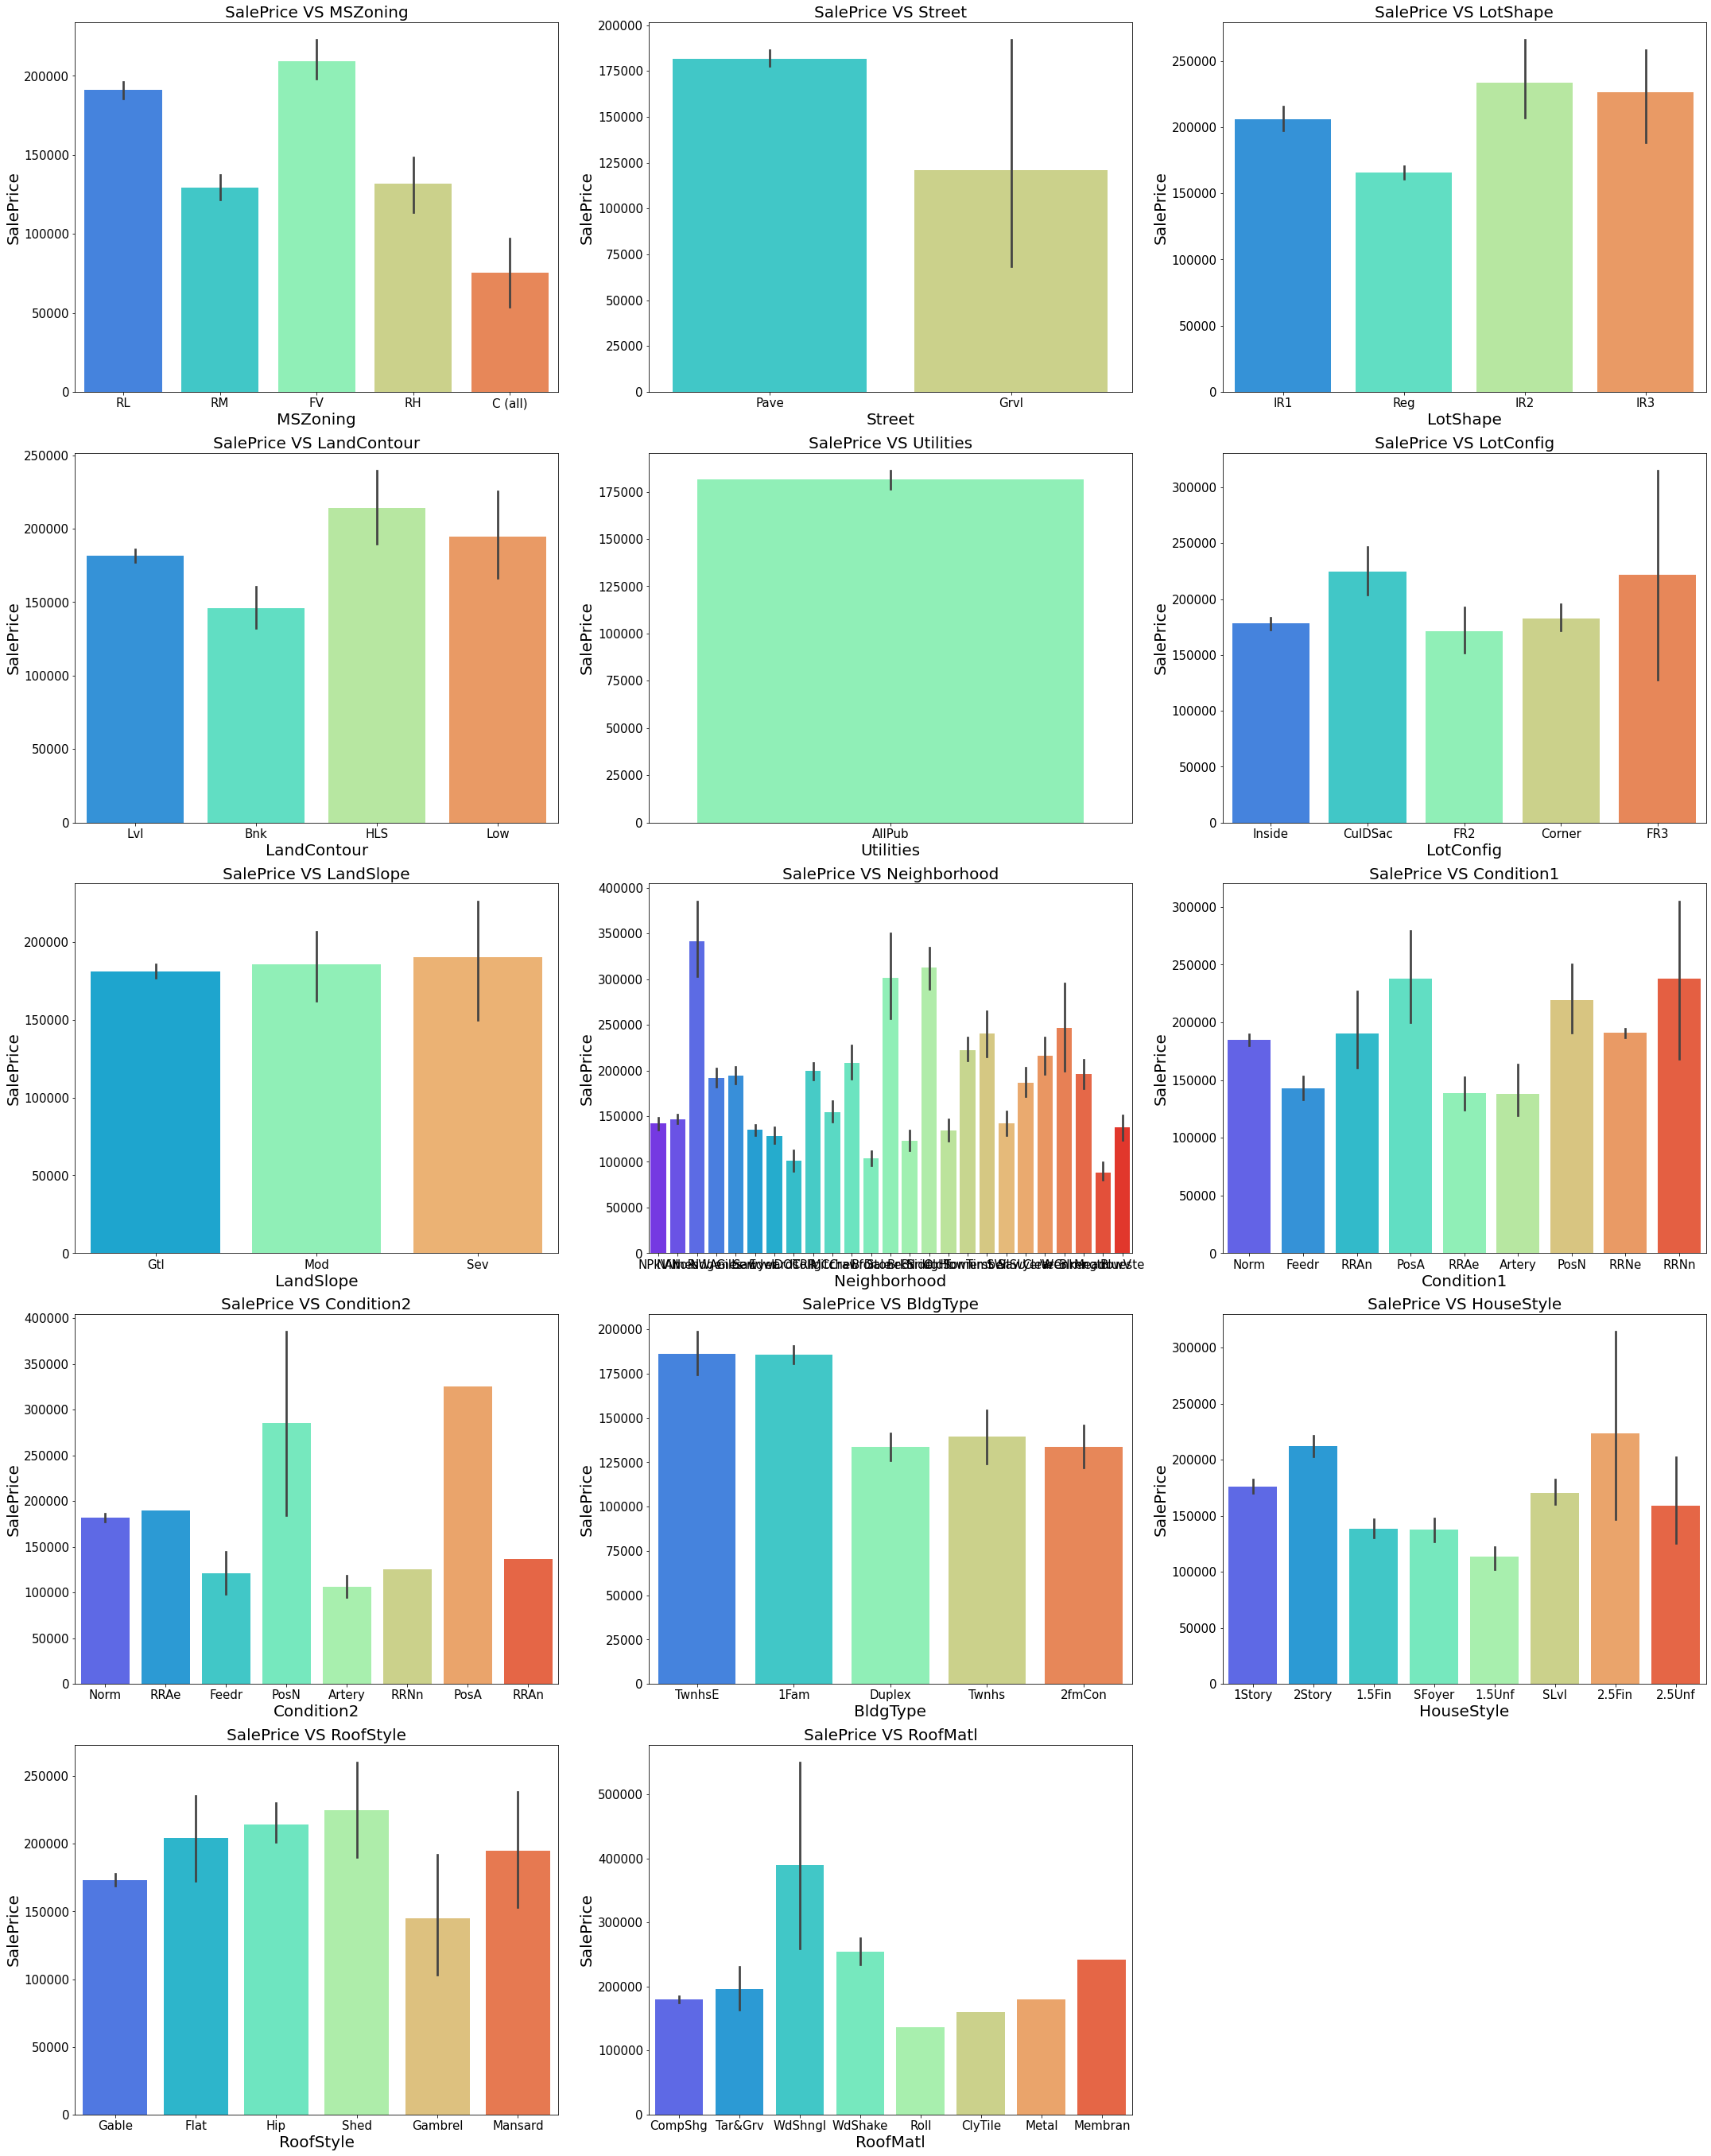

In [59]:
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(df_cat)):
    if plotnumber <15:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[df_cat[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {df_cat[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(df_cat[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

# Bivariate analysis for categorical features

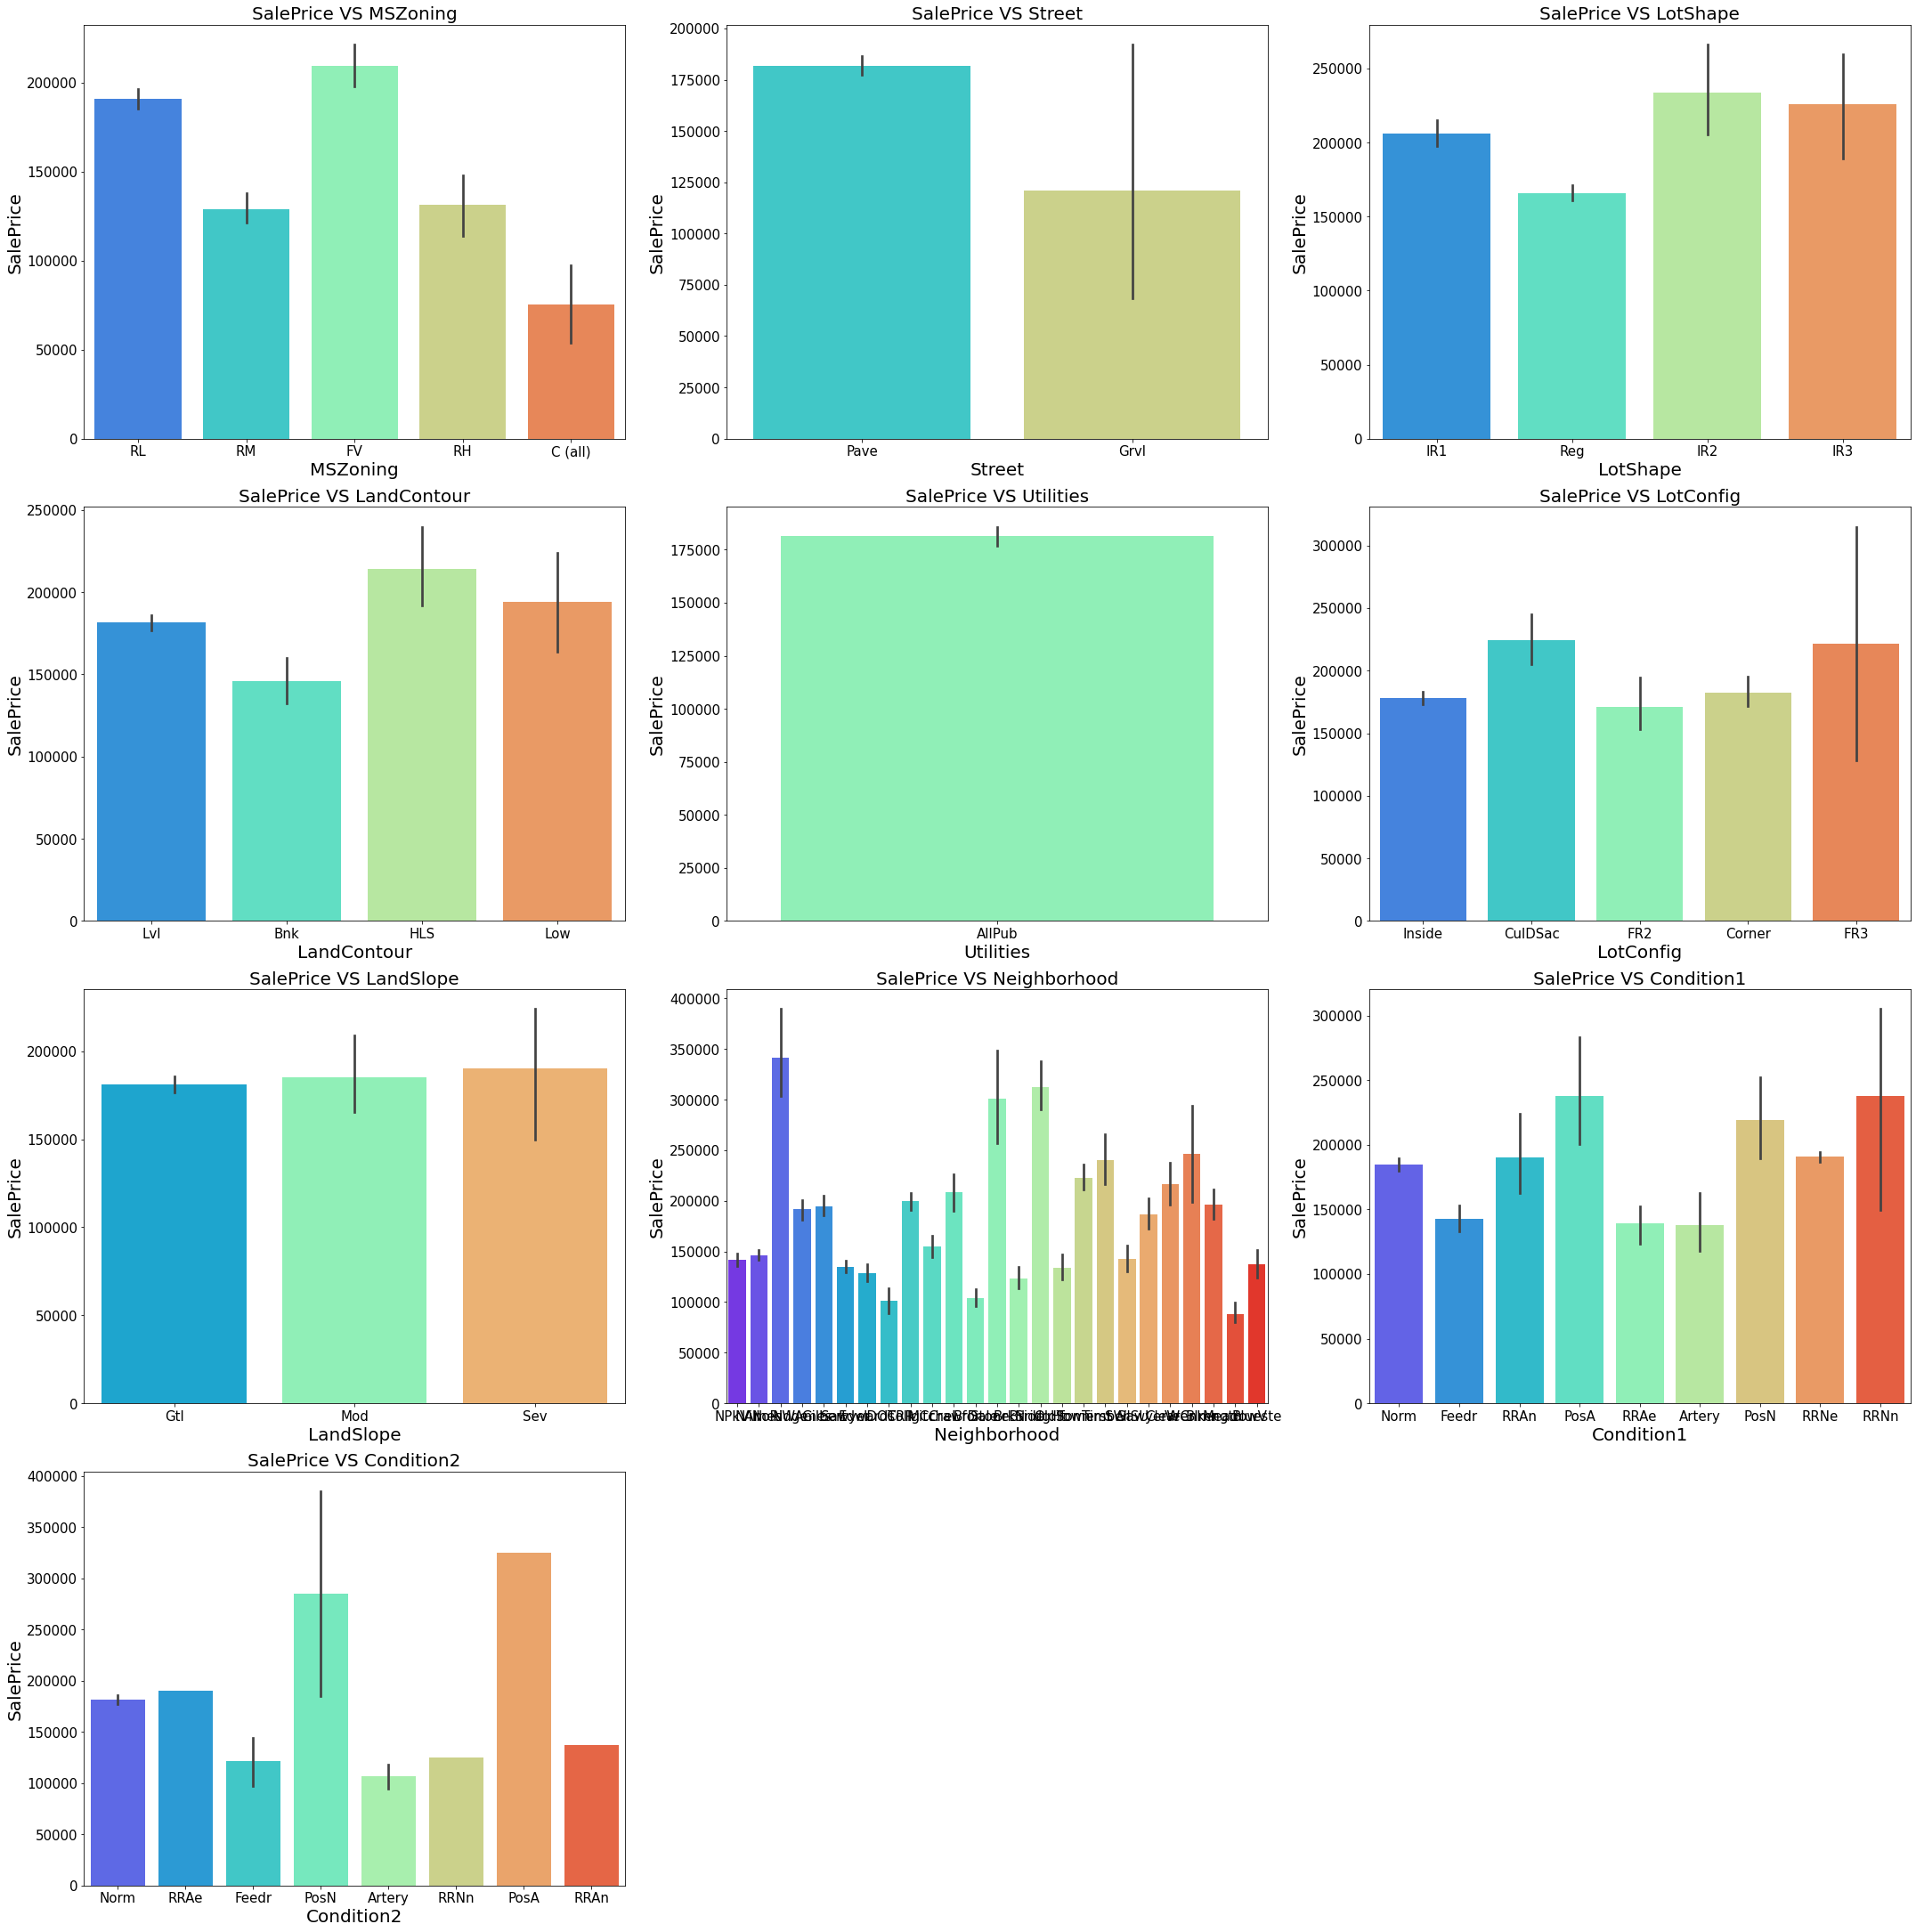

In [60]:
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(df_cat1)):
    if plotnumber <15:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[df_cat1[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {df_cat1[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(df_cat1[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

Saleprice is higher for the follwing categories

Feature Name : Name of categories for which sale price is higher

MSZoning - Floating Village Residential(FV) and Residential Low Density(RL)

Street - Paved

LotSpace - Slightly irregular(IR1), Moderately Irregular(IR2) and Irregular(IR3)

LandContour - Slightly higher for Hillside

LotConfig - CulDSac

LandSlope - all catergories all almost of same price

Neighborhood - Northridge(NoRidge) locations within Ames city

Condition 1 - Within 200' of North-South Railroad(RRNn), Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt

Condition 2 - Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt

# Bivariate analysis for categorical features

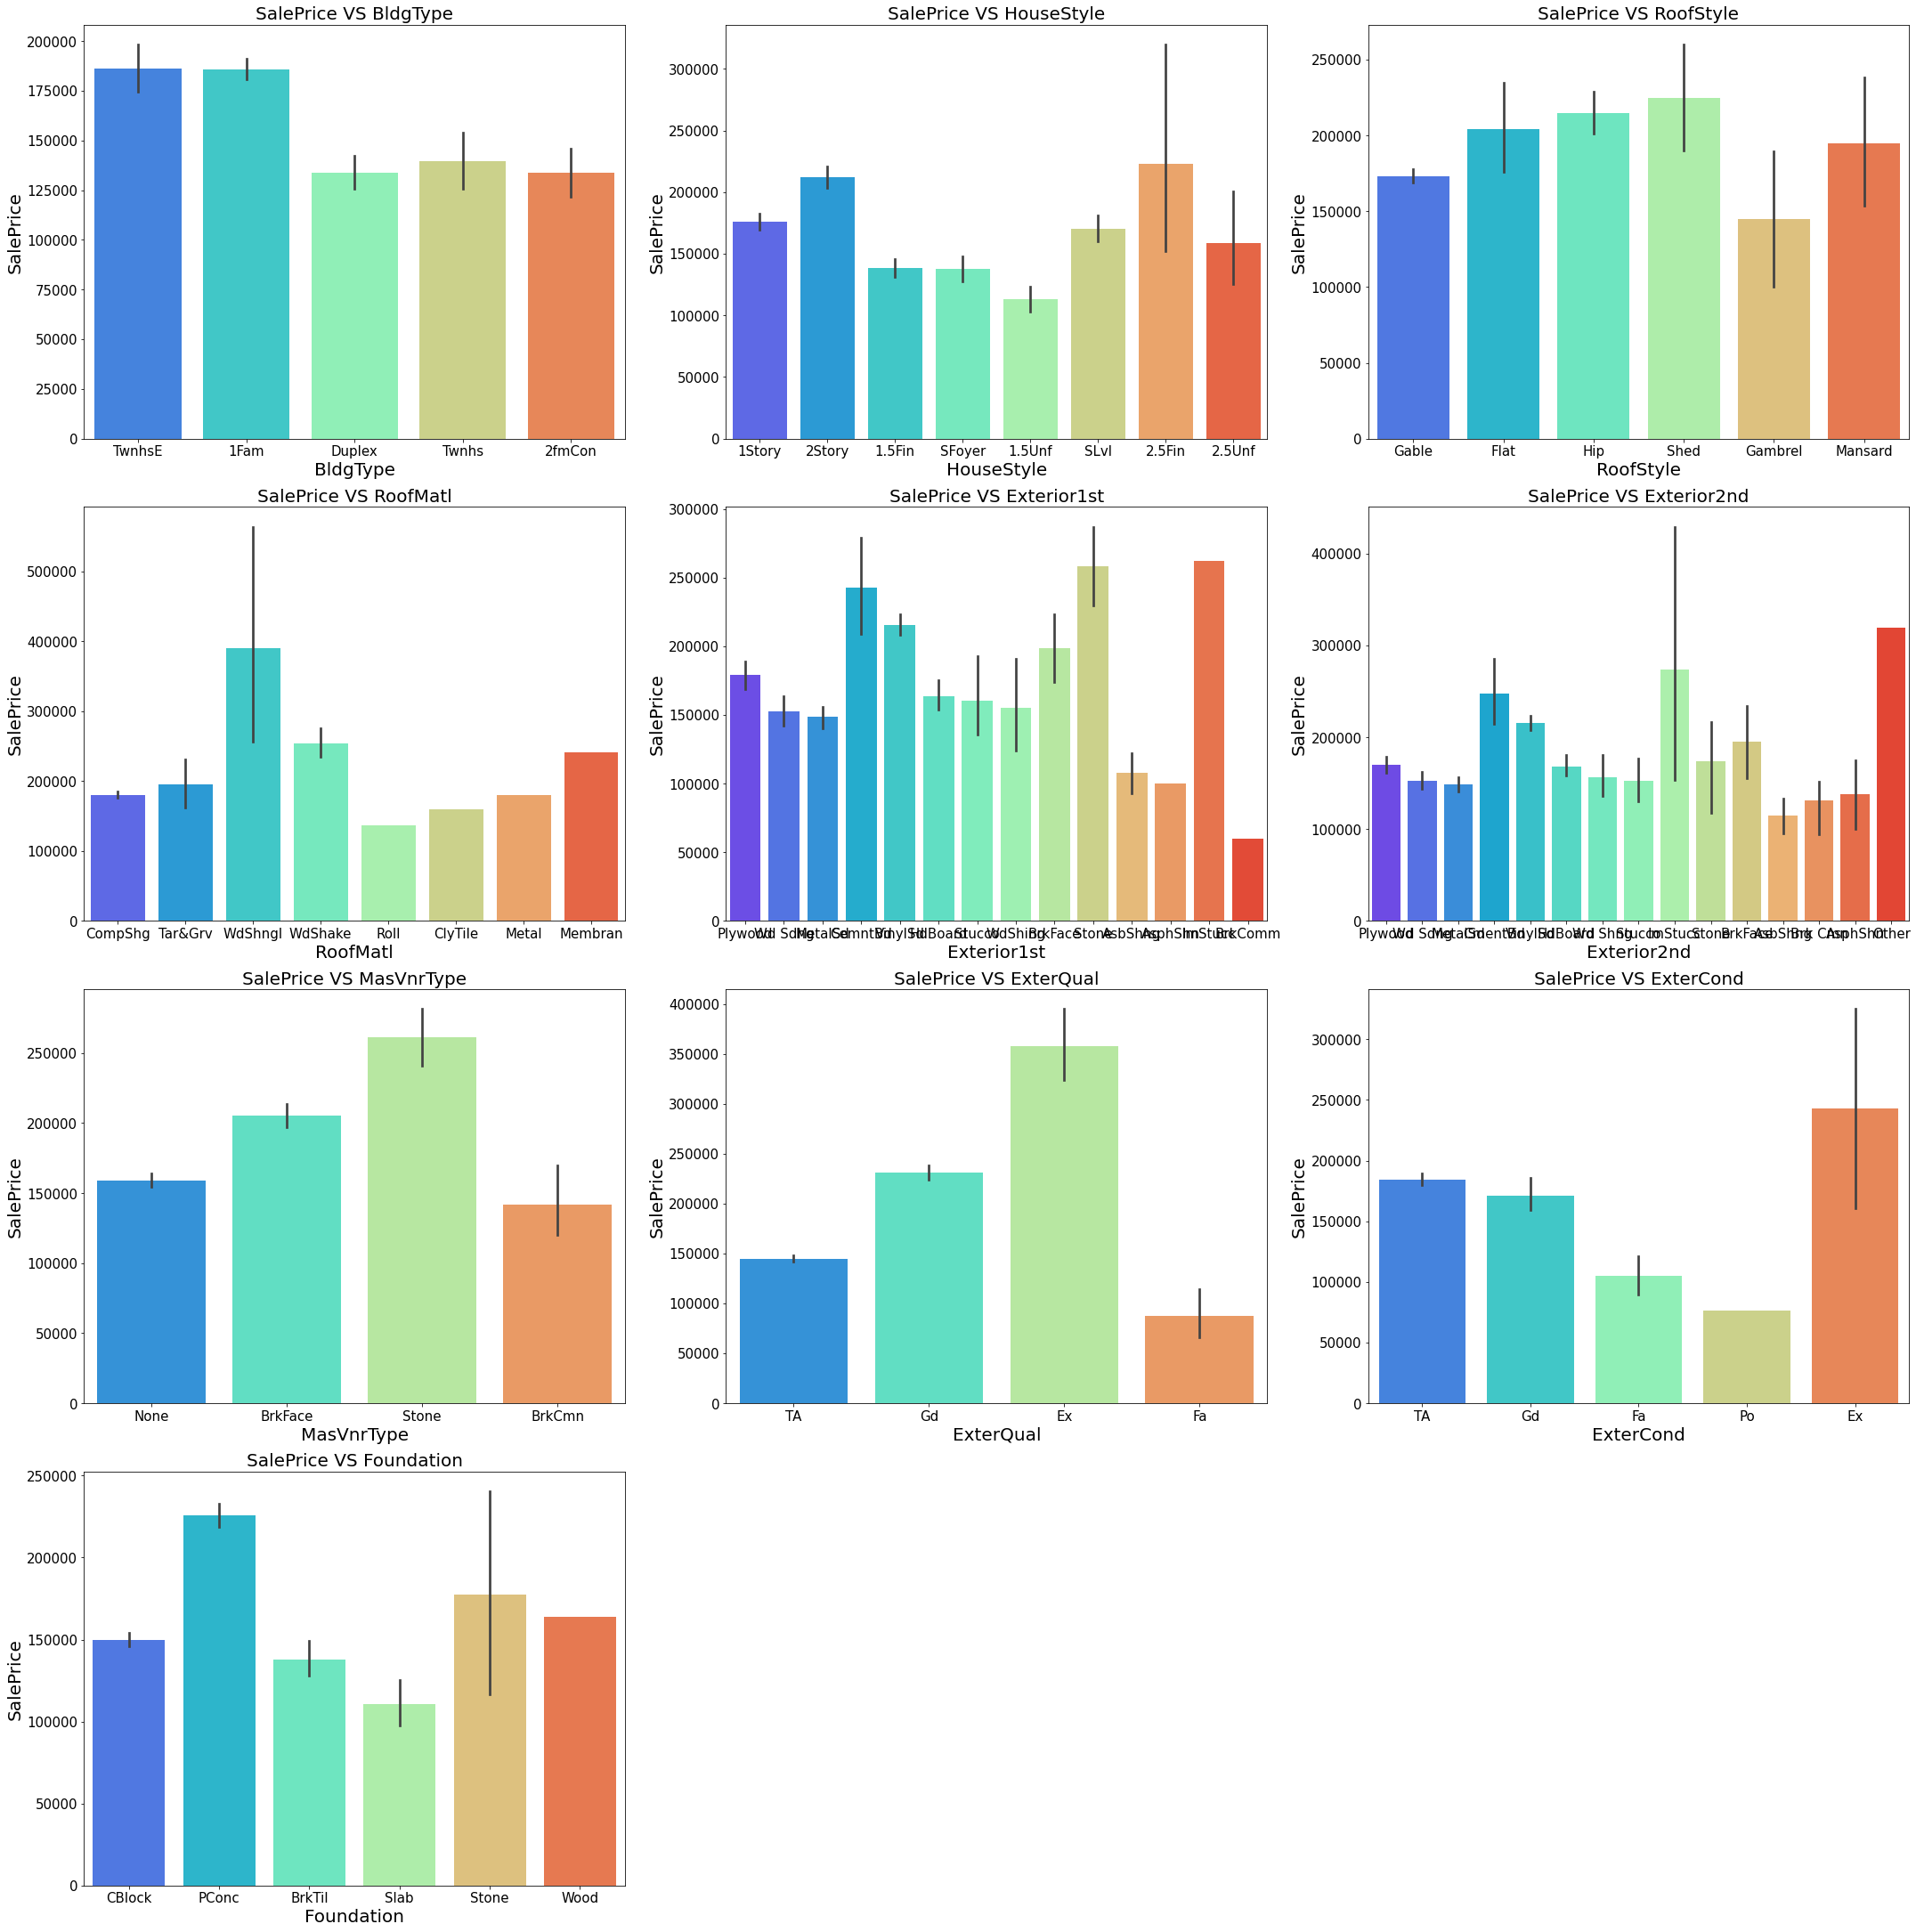

In [61]:
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(df_cat2)):
    if plotnumber <15:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[df_cat2[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {df_cat2[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(df_cat2[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

Saleprice is higher for the follwing categories

Feature Name : Name of categories for which sale price is higher
BsmtQual - Excellent(100+ inches)(Ex)

BsmtCond - Good(Gd) 

BsmtExposure -  Good Exposure(Gd)

BsmtFinType1 - Good Living Quarters(GLQ)

BsmtFinType2 -  Good Living Quarters(GLQ) and Average Living Quarters(ALQ) 

# Bivariate analysis for categorical features

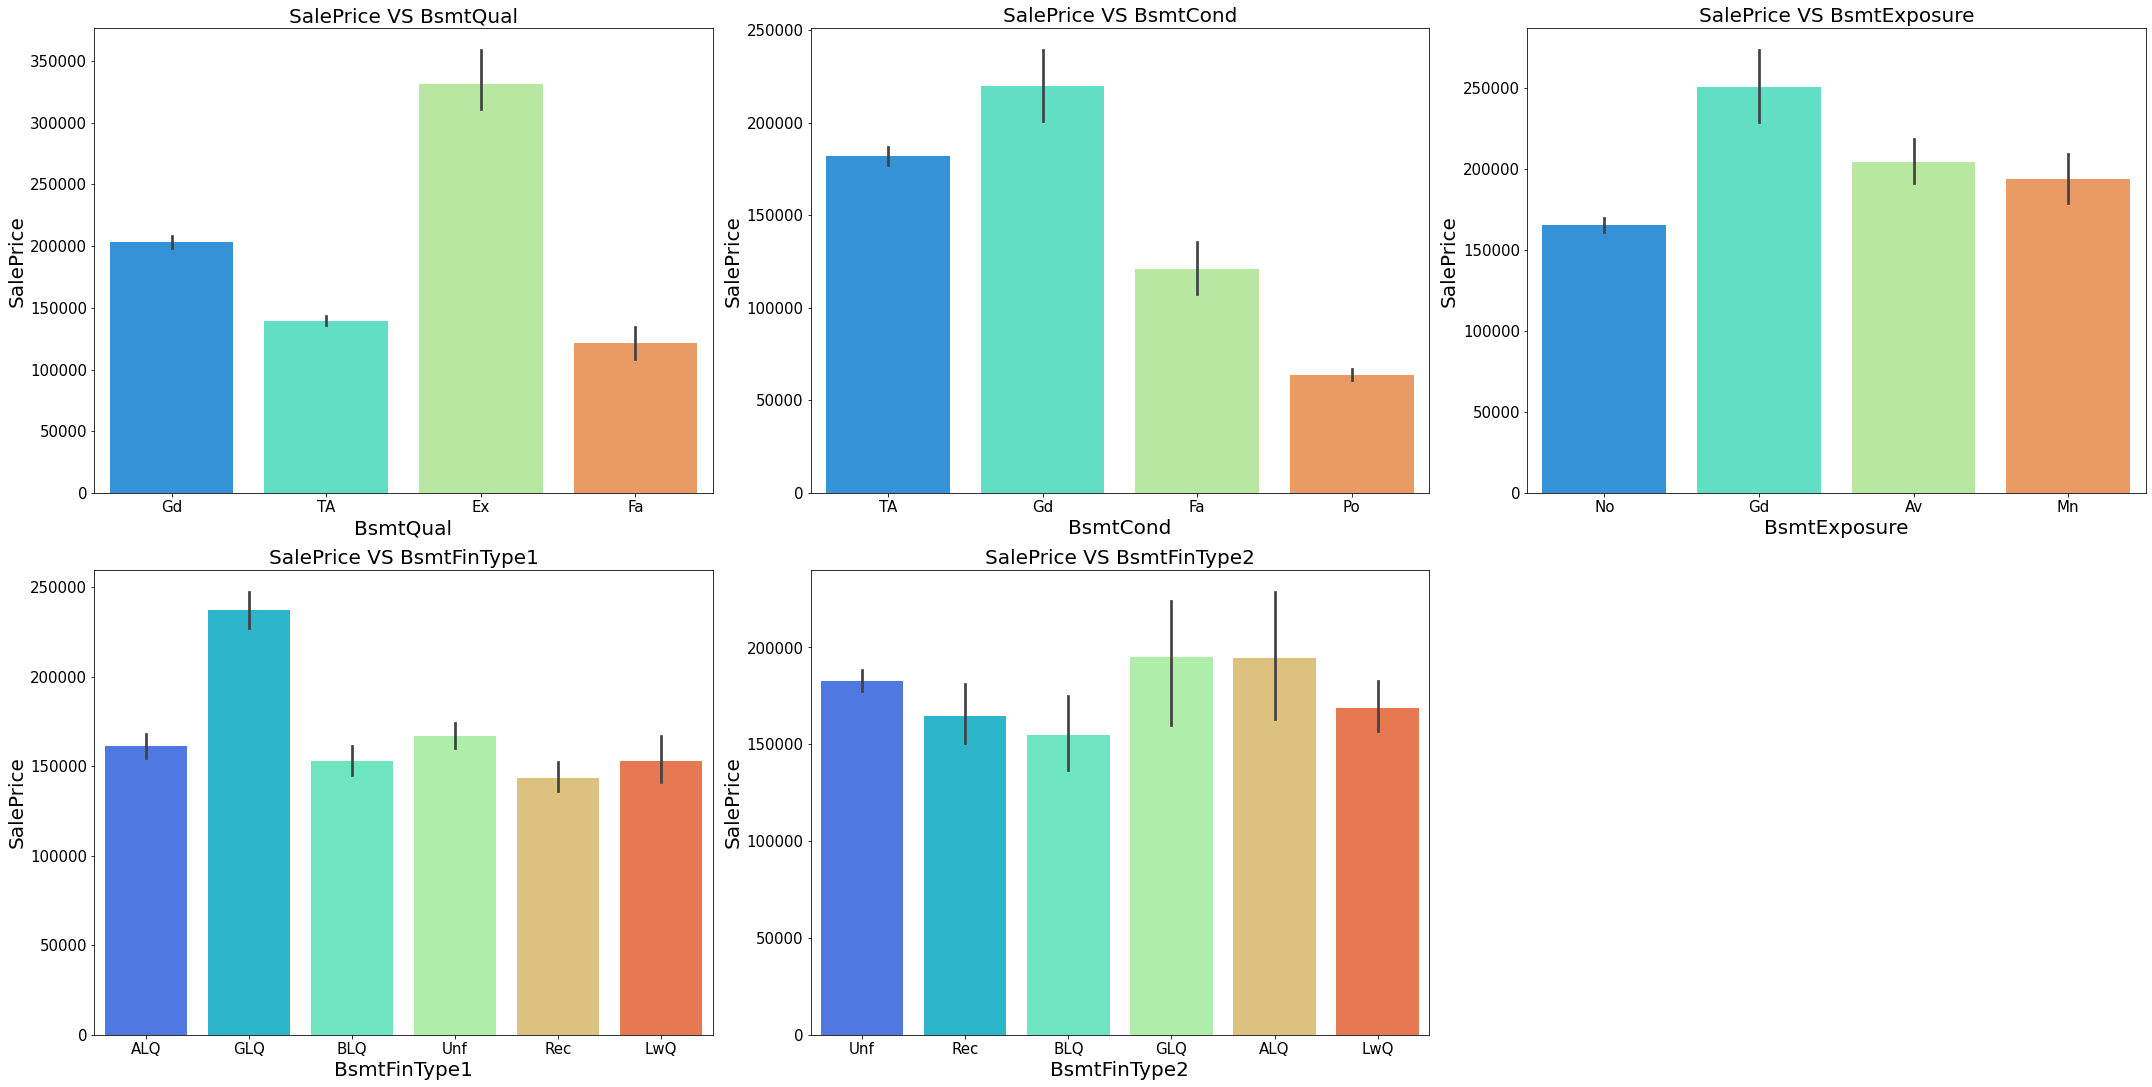

In [62]:
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(df_cat3)):
    if plotnumber <15:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[df_cat3[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {df_cat3[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(df_cat3[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

Saleprice is higher for the follwing categories

Feature Name : Name of categories for which sale price is higher
BsmtQual - Excellent(100+ inches)(Ex)

BsmtCond - Good(Gd) 

BsmtExposure -  Good Exposure(Gd)

BsmtFinType1 - Good Living Quarters(GLQ)

BsmtFinType2 -  Good Living Quarters(GLQ) and Average Living Quarters(ALQ) 

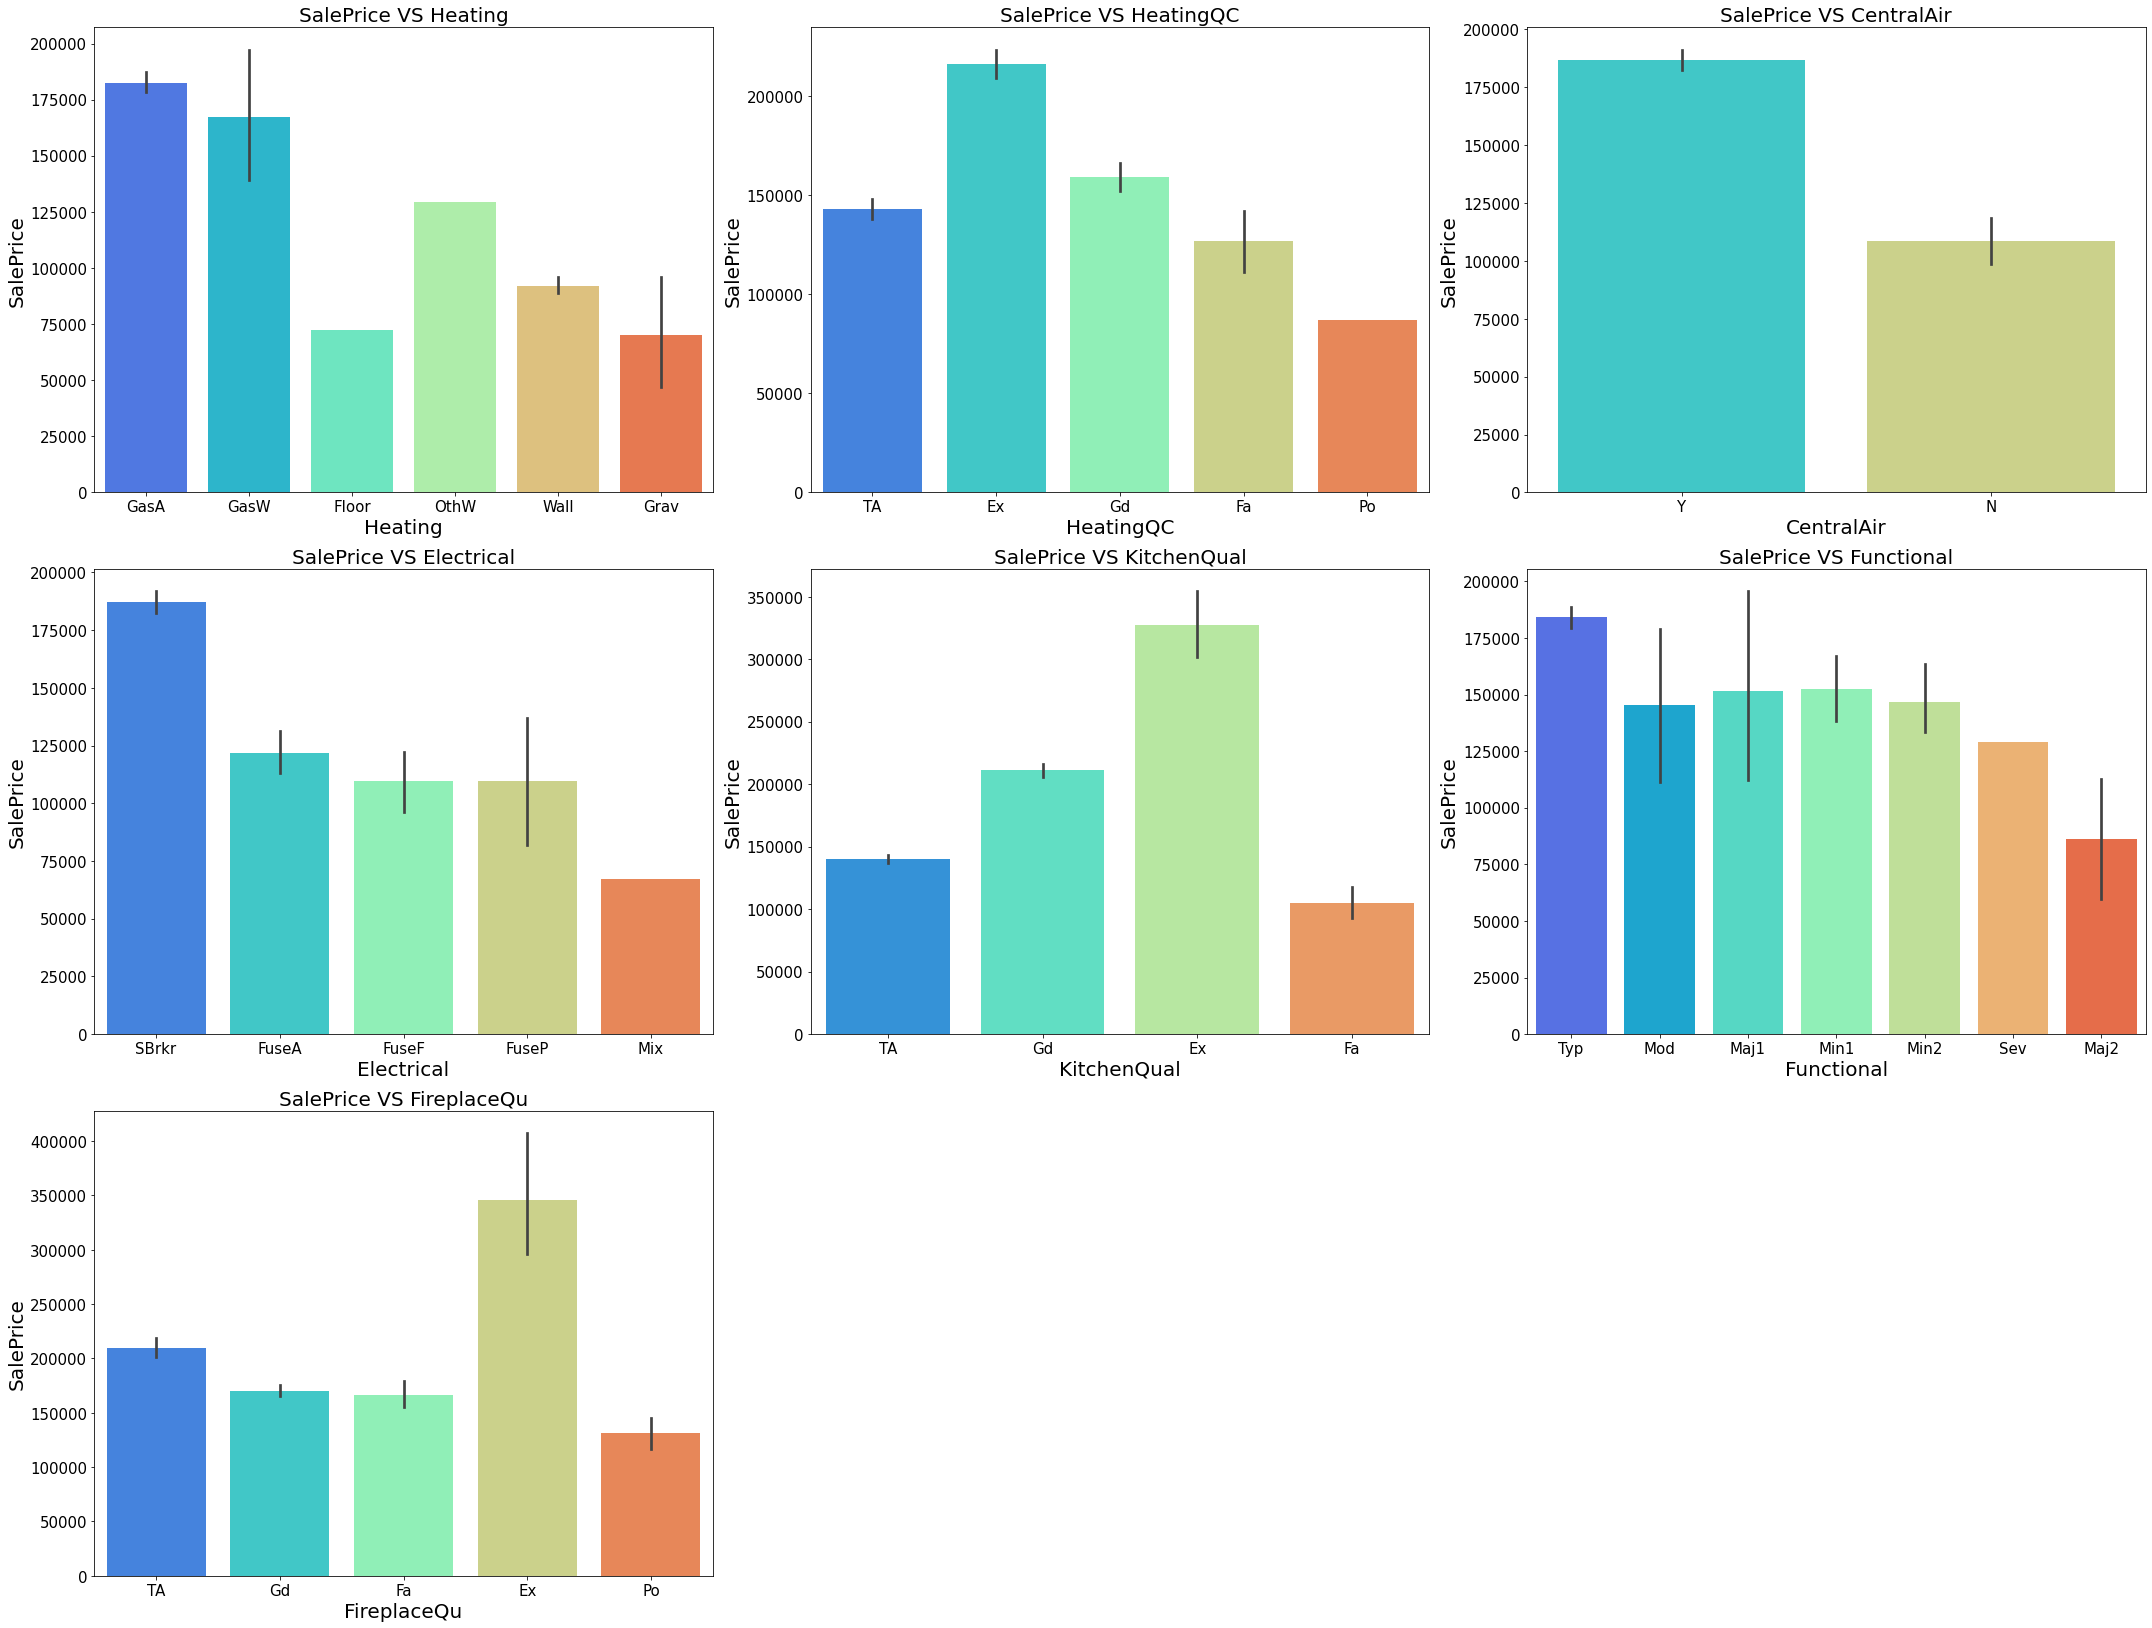

In [63]:
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(df_cat4)):
    if plotnumber <15:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[df_cat4[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {df_cat4[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(df_cat4[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

Saleprice is higher for the follwing categories

Feature Name : Name of categories for which sale price is higher

Heating - Gas forced warm air furnace(GasA) and Gas hot water or steam heat(GasW) 

HeatingQC - Excellent(Ex)

CentralAir - Central air conditioning

Electrical - Standard Circuit Breakers & Romex(Sbrkr) 

KitchenQual - Excellent(Ex)

Functional - Typical Functionality(Typ) type of Home functionality (Assume typical unless deductions are warranted)

FireplaceQual -  Excellent - Exceptional Masonry Fireplace(Ex) 

# Bivariate analysis for categorical features

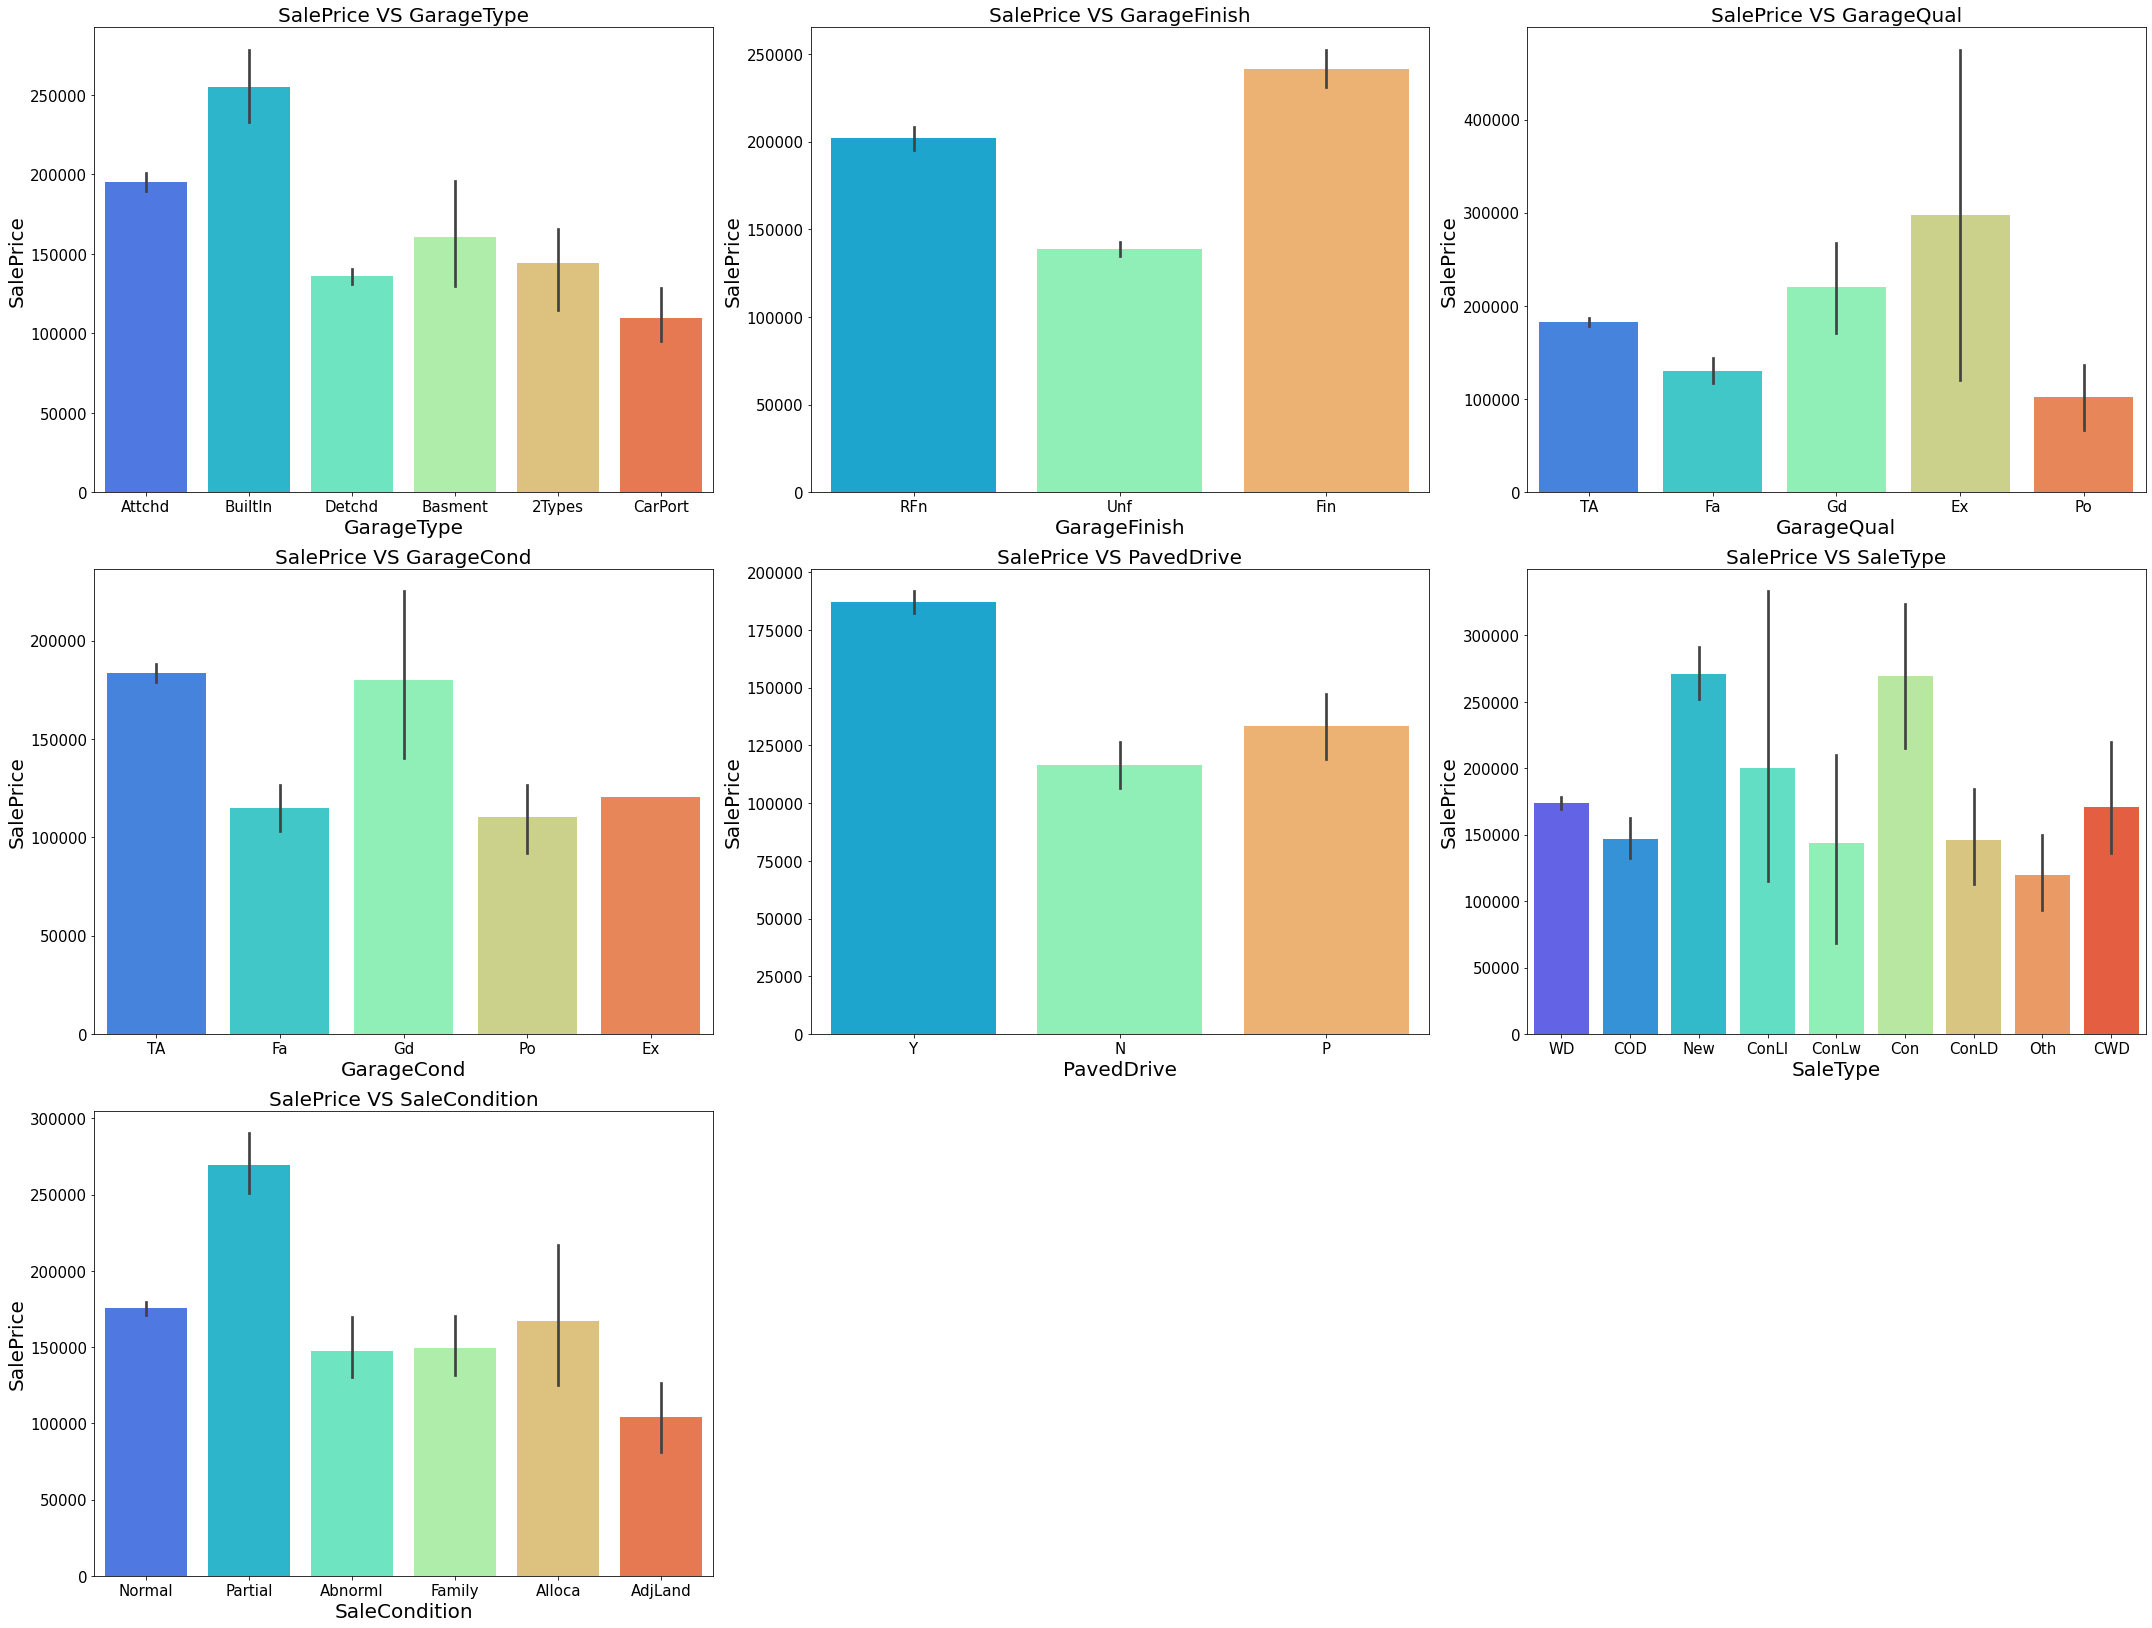

In [64]:
plt.figure(figsize=(30,150))
plotnumber=1
for i in range(len(df_cat5)):
    if plotnumber <15:
        plt.subplot(20,3,plotnumber)
        sns.barplot(x=df[df_cat5[i]],y=df['SalePrice'],palette='rainbow')
        plt.title(f"SalePrice VS {df_cat5[i]}",fontsize=20)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=15)
        plt.xlabel(df_cat5[i],fontsize = 20)
        plt.ylabel('SalePrice',fontsize = 20)
        plt.tight_layout()
    plotnumber = plotnumber+1

Saleprice is higher for the follwing categories

Feature Name : Name of categories for which sale price is higher

 GarageType - Built-In (Garage part of house - typically has room above garage)(BuiltIn) 

GarageFinish - Completely finished(Fin) 

GarageQual - Excellent(Ex)

GarageCond - Typical/Average(TA) and Good(Gd) 

PavedDrive - Paved 

SaleType - Home just constructed and sold(New) and Contract 15% Down payment regular terms(Con)

SalesCondition - Home was not completed when last assessed (associated with New Homes)(Partial) 

# Checking for Outliers

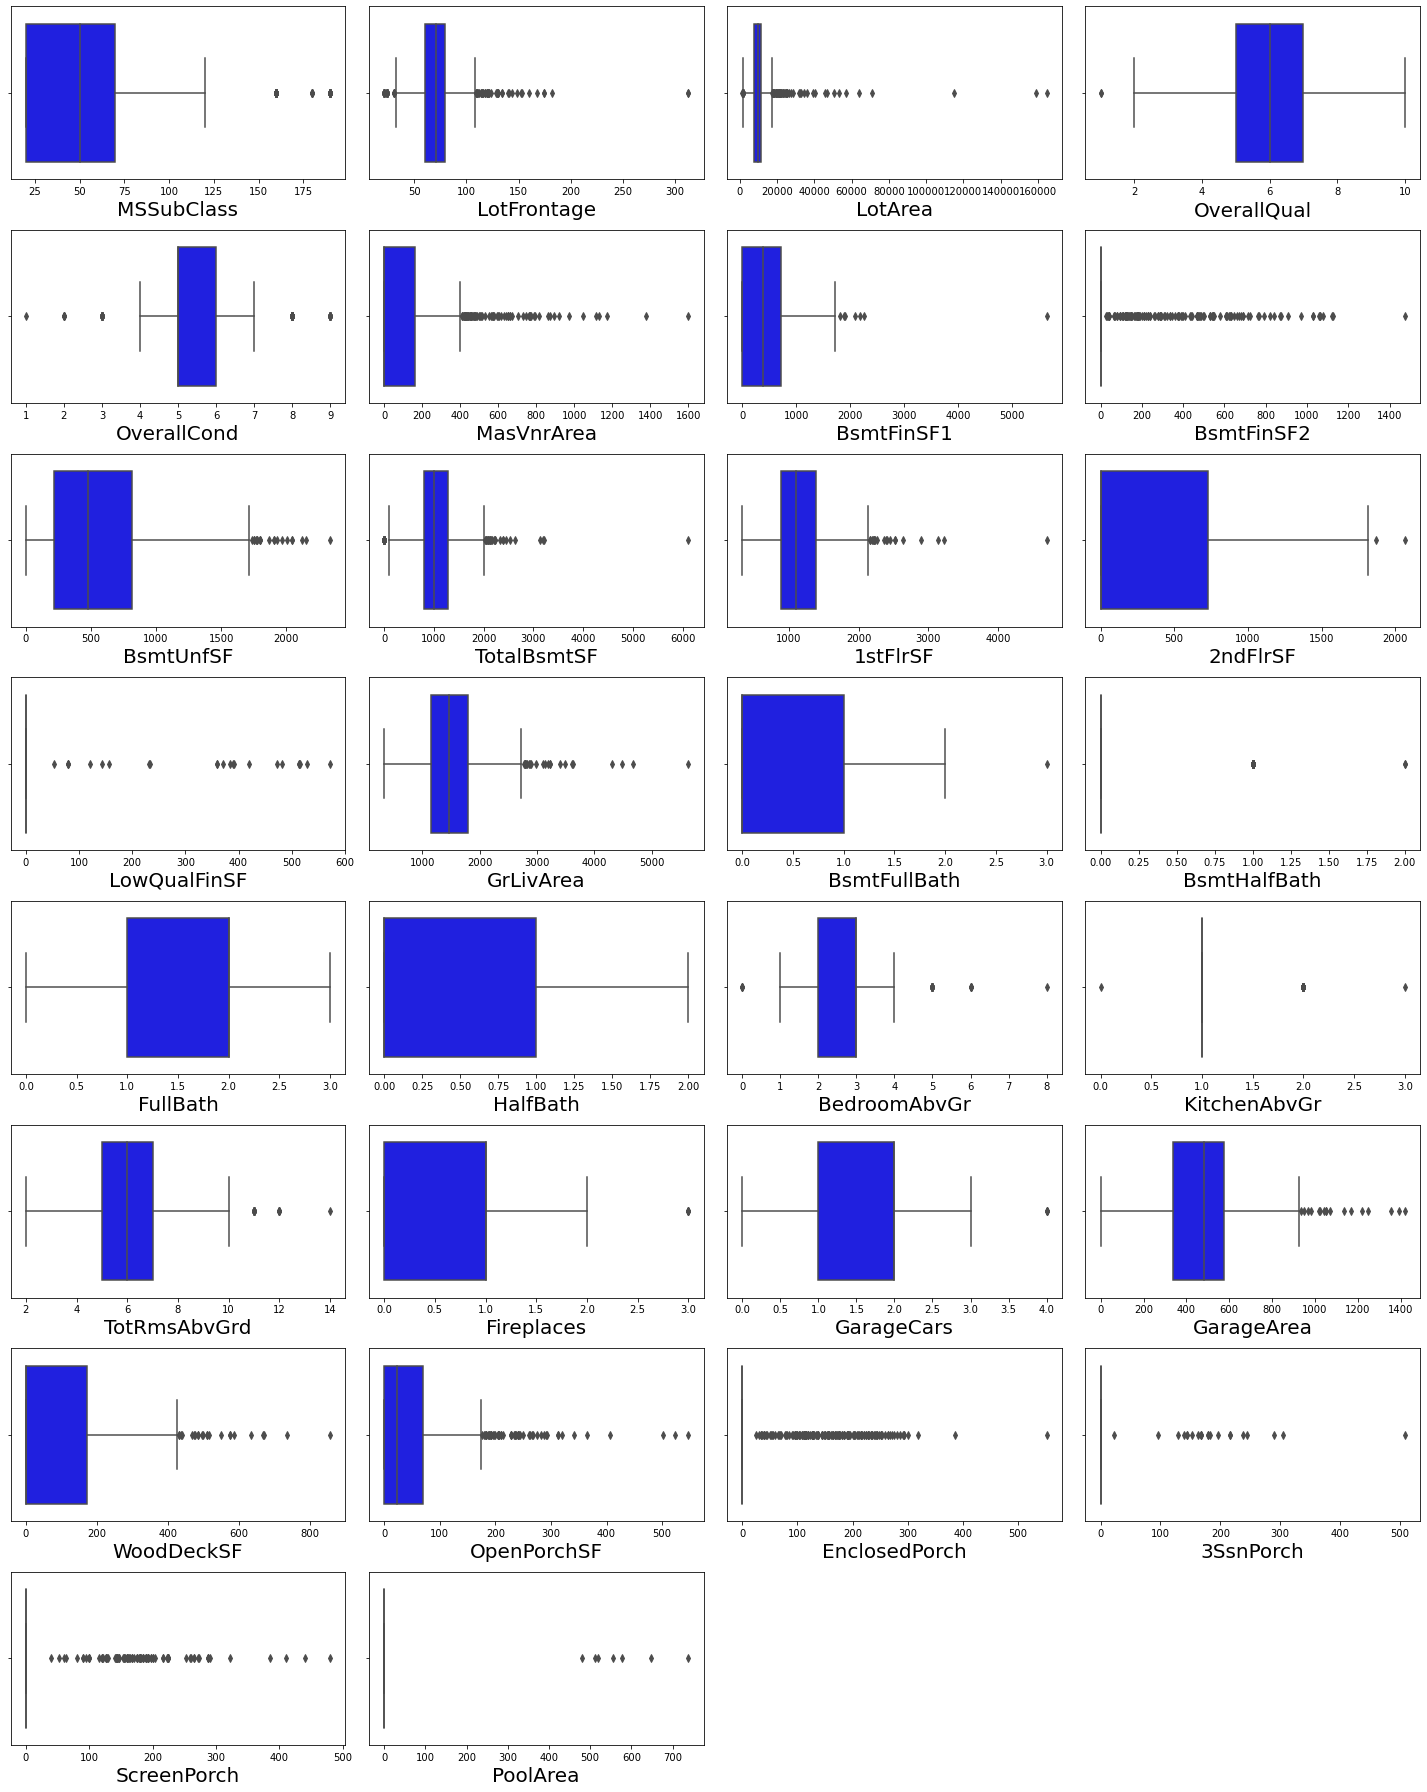

In [65]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_num:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are features with outliers, we will consider the continuous numerical datatype features for removing the outliers.

In [66]:
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']]

In [67]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PoolArea MiscVal MoSold SaleType  \
0    AllPub    Inside       Gtl  ...        0       0      2       WD   
1    AllPub    Inside       Mod  ...        0       0     10       WD   
2    AllPub   CulDSac       Gtl  ...        0       0      6       WD   
3    AllPub    Inside       Gtl  ...        0       0      1      COD   
5    AllPub    Inside       Gtl  ...        0       0     11      New   

  SaleCondition  SalePrice  Built_Age RemodAdded_Time Sold_Time Garage_Age  
0        Normal     128000         34              34         3       33.0  
1        Normal     268000         40              40         3       40.0  
2        Normal     269790         14              13         3       13.0  
3        Normal     190000         33              33         0       33.0  
5       Partial     219210          4               4         4        4.0  

[5 rows x 76 columns]

In [68]:
df_new.shape

(957, 76)

In [69]:
df.shape

(1168, 76)

In [70]:
loss=(1168-957)/1168
loss

0.18065068493150685

So 18 % loss is not acceptable

In [71]:
#Removing outliers using percentile method in train dataset
for col in features:    
    percentile = df[col].quantile([0.01,0.98]).values
    df[col][df[col]<=percentile[0]]=percentile[0]
    df[col][df[col]>=percentile[1]]=percentile[1]

Removed the outliers using percentile method

In [72]:
#Removing outliers using percentile method in test dataset
for col in features:    
    percentile = df_test[col].quantile([0.01,0.98]).values
    df_test[col][df[col]<=percentile[0]]=percentile[0]
    df_test[col][df[col]>=percentile[1]]=percentile[1]

# Removing Skewness

In [73]:
df.skew()

MSSubClass          1.422019
LotFrontage         0.188060
LotArea             1.191912
OverallQual         0.175082
OverallCond         0.580714
MasVnrArea          1.873138
BsmtFinSF1          0.639523
BsmtFinSF2          4.365829
BsmtUnfSF           0.777624
TotalBsmtSF         0.166773
1stFlrSF            0.645842
2ndFlrSF            0.717390
LowQualFinSF        8.666142
GrLivArea           0.592755
BsmtFullBath        0.355224
BsmtHalfBath        3.954345
FullBath            0.057809
HalfBath            0.656492
BedroomAbvGr       -0.145762
KitchenAbvGr        4.374289
TotRmsAbvGrd        0.443931
Fireplaces          0.552677
GarageCars         -0.434745
GarageArea         -0.135675
WoodDeckSF          1.053617
OpenPorchSF         1.513678
EnclosedPorch       3.043610
3SsnPorch           9.770611
ScreenPorch         4.105741
PoolArea           13.243711
MiscVal            23.065943
MoSold              0.220979
SalePrice           1.953878
Built_Age           0.579204
RemodAdded_Tim

In [74]:
#Creating a list of skewed features in train dataset
skewd_features=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

In [75]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [76]:
df[skewd_features] = scaler.fit_transform(df[skewd_features].values)
df[skewd_features].skew()

LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

In [77]:
df_test.skew()

MSSubClass          1.358597
LotFrontage         0.369853
LotArea            12.781805
OverallQual         0.397312
OverallCond         1.209714
MasVnrArea          3.053281
BsmtFinSF1          1.266642
BsmtFinSF2          3.698543
BsmtUnfSF           0.969310
TotalBsmtSF         0.230078
1stFlrSF            0.677992
2ndFlrSF            2.193410
LowQualFinSF       10.929928
GrLivArea           1.010586
BsmtFullBath        0.481397
BsmtHalfBath        3.932772
FullBath           -0.049800
HalfBath            0.758892
BedroomAbvGr       -0.367623
KitchenAbvGr        5.820293
TotRmsAbvGrd        0.805535
Fireplaces          1.246932
GarageCars         -0.361649
GarageArea          0.043194
WoodDeckSF          3.104900
OpenPorchSF         2.787956
EnclosedPorch       3.177046
3SsnPorch          12.277476
ScreenPorch         4.182351
PoolArea            0.000000
MiscVal            13.264758
MoSold              0.186504
Built_Age           0.755233
RemodAdded_Time     0.535600
Sold_Time     

In [78]:
df_test[skewd_features] = scaler.fit_transform(df_test[skewd_features].values)

In [79]:
df_test[skewd_features].skew()

LotArea         0.003111
MasVnrArea      1.854910
BsmtFinSF1      0.178420
BsmtUnfSF      -0.406900
1stFlrSF        0.001185
2ndFlrSF        1.754484
GrLivArea      -0.000307
BsmtHalfBath    3.932772
HalfBath        0.621093
KitchenAbvGr    0.000000
Fireplaces      0.716039
WoodDeckSF      1.546036
OpenPorchSF     0.876384
dtype: float64

# Encoding of features

In [80]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df_test[i] = df_test[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [81]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
#Ordinal encoding for test dataset
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=OE.fit_transform(df_test[i].values.reshape(-1,1))

# Correlation Coefficient Check

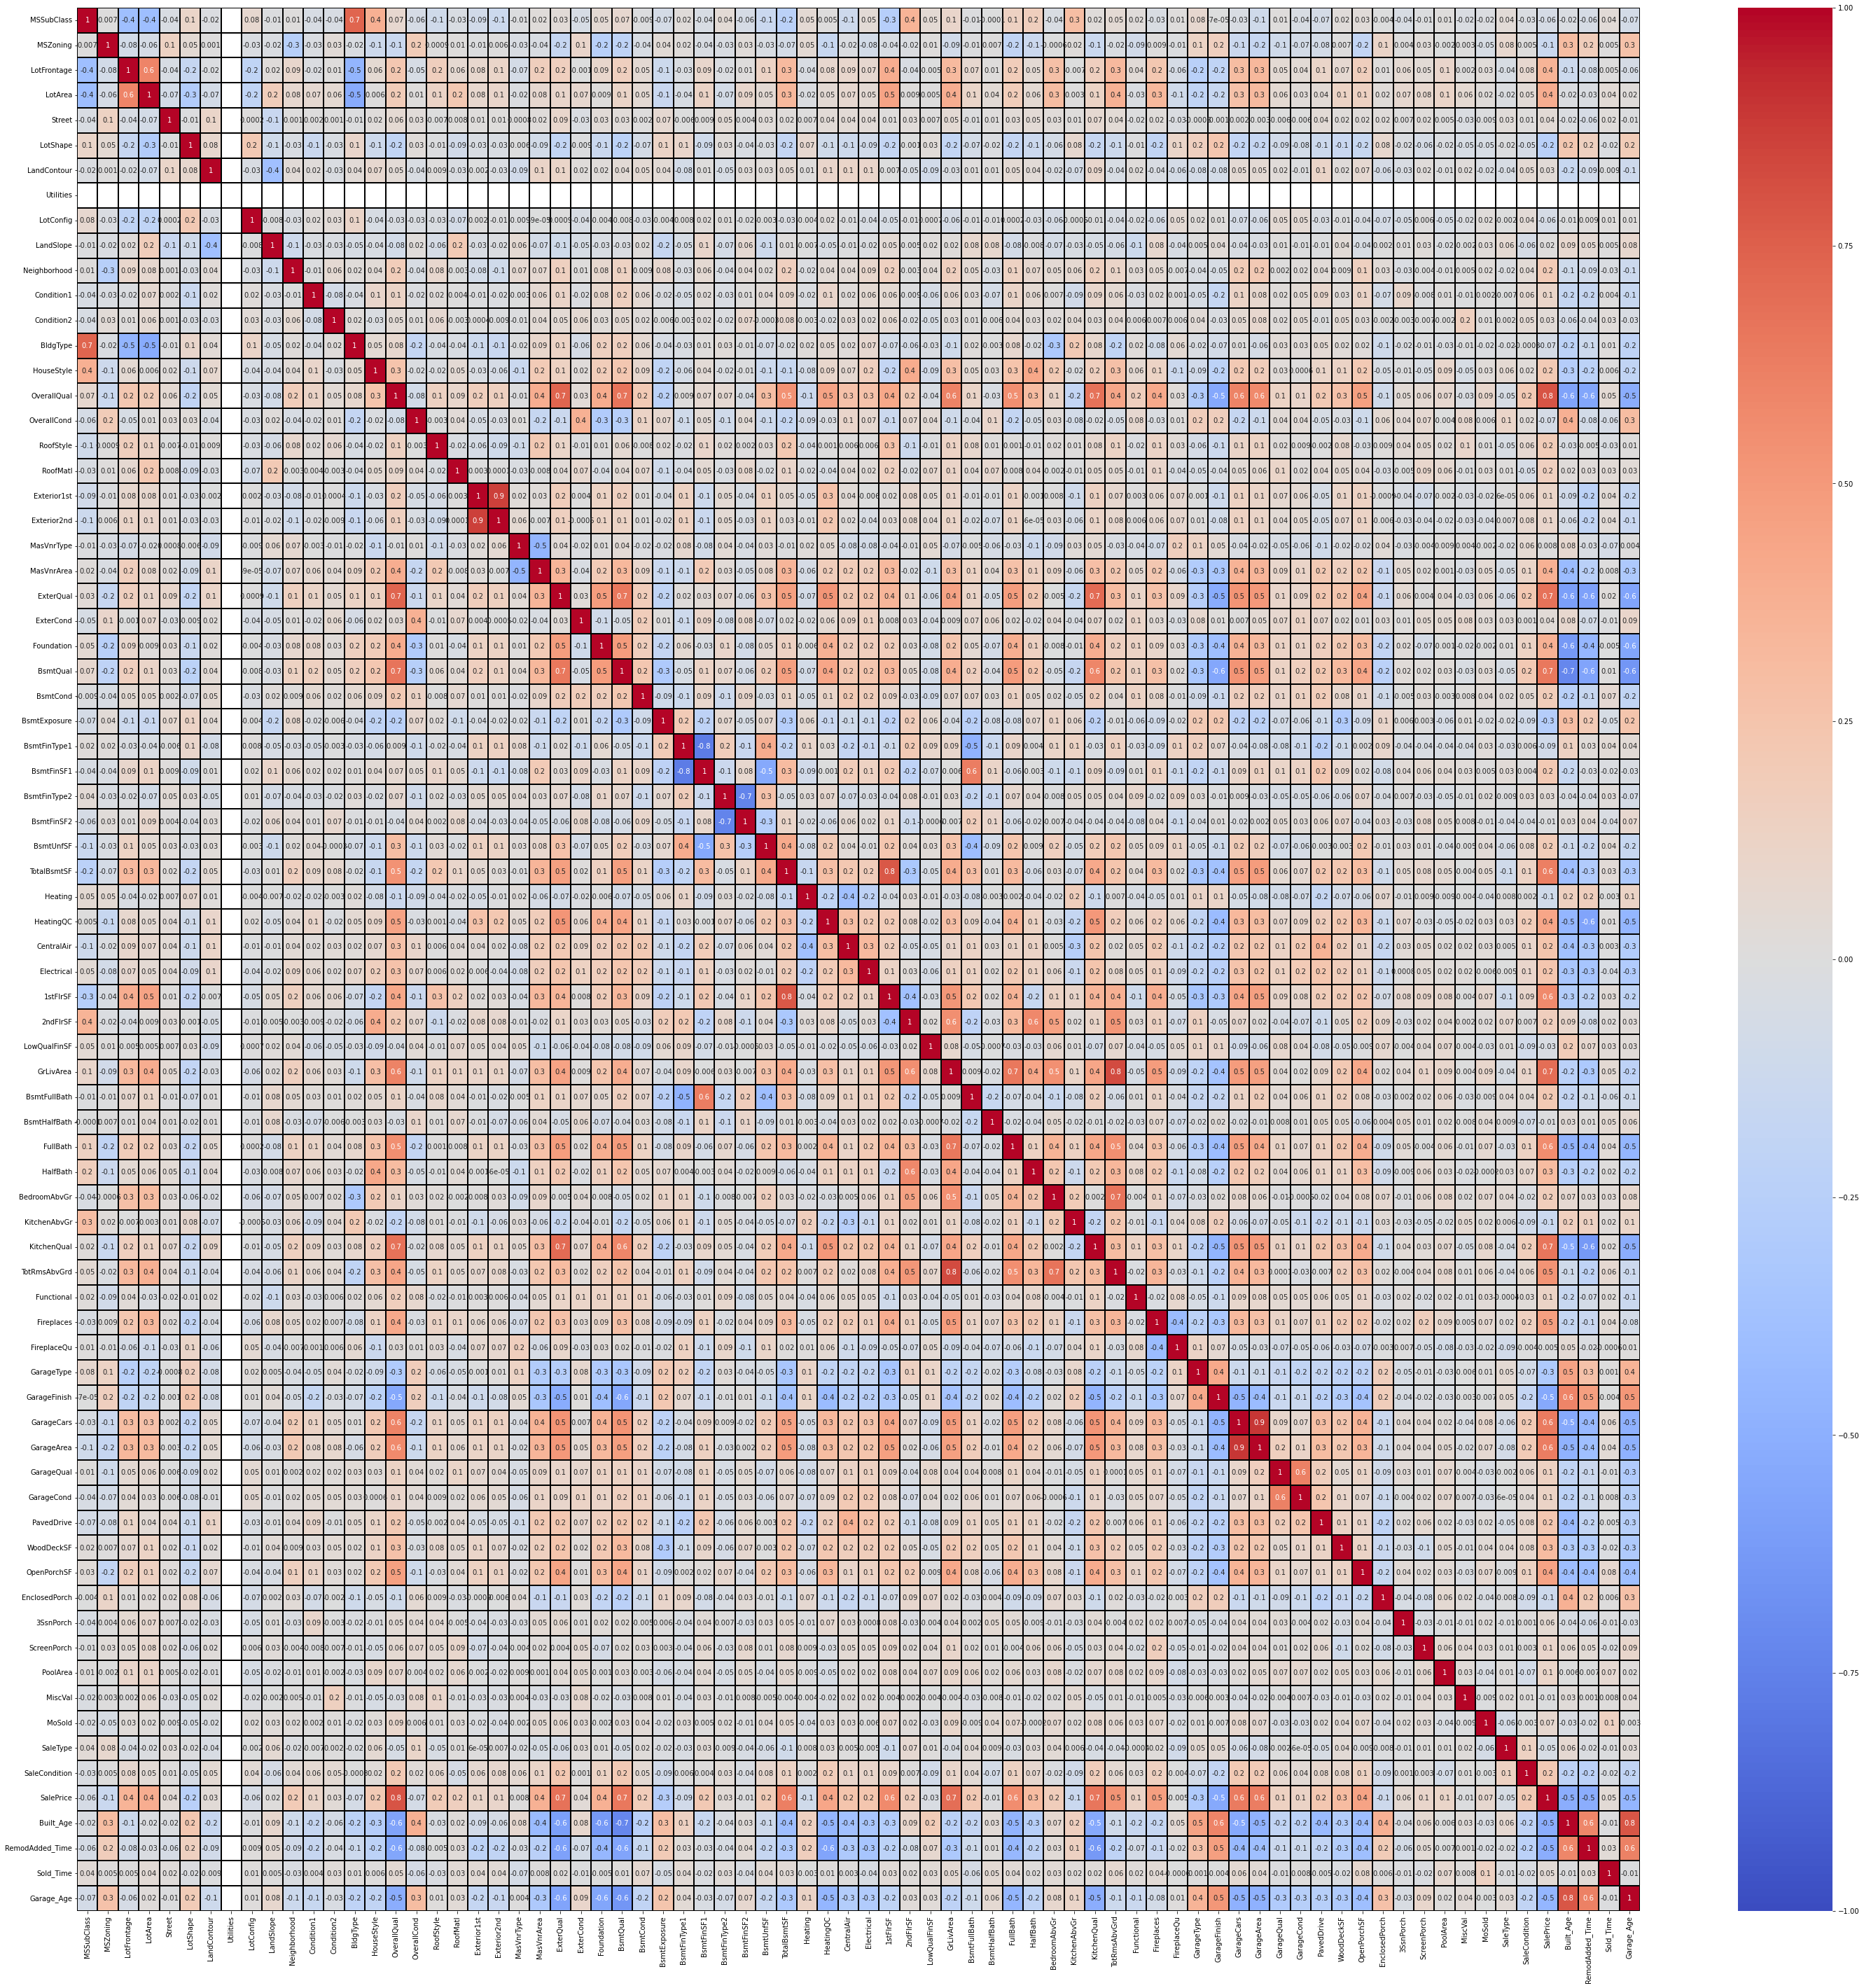

In [82]:
# Visualizing the correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

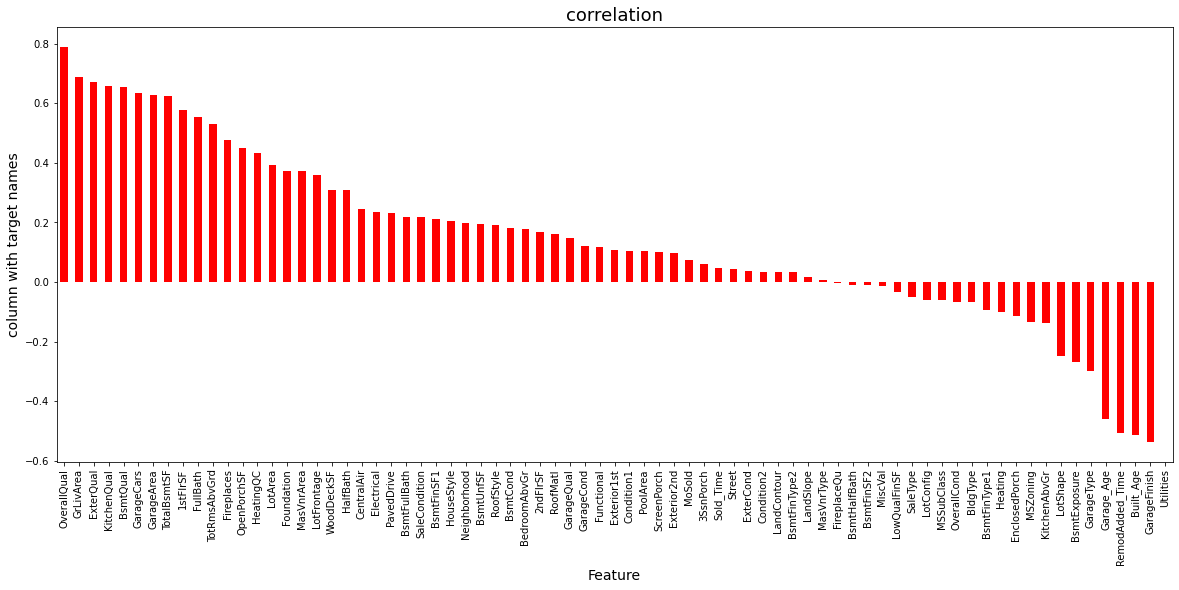

In [83]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Separating features and target in train dataset

In [84]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

# Scaling of data

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [86]:
#scaling of test dataset
X_1= pd.DataFrame(scaler.fit_transform(x), columns=df_test.columns)

In [87]:
X.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
                  ..
SaleCondition      0
Built_Age          0
RemodAdded_Time    0
Sold_Time          0
Garage_Age         0
Length: 75, dtype: int64

# Checking for multicolinearity issue in train dataset using VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features         Features
0       5.548826       MSSubClass
1       1.362559         MSZoning
2       2.060886      LotFrontage
3       2.676430          LotArea
4       1.120502           Street
..           ...              ...
70      1.198406    SaleCondition
71      8.502432        Built_Age
72      3.097658  RemodAdded_Time
73      1.099979        Sold_Time
74      4.082254       Garage_Age

[75 rows x 2 columns]

In [89]:
X=X.drop(['GrLivArea'],axis=1)

In [90]:
X_1=X_1.drop(['GrLivArea'],axis=1)

# PCA

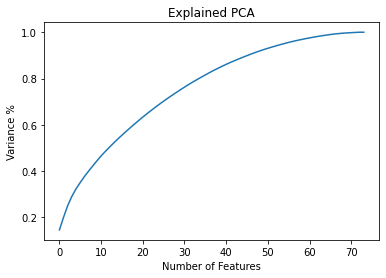

In [91]:
from sklearn.decomposition import PCA

pca = PCA()
principleComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance %')
plt.title('Explained PCA')
plt.show()

70 features required for best accuracy

In [92]:
df.shape

(1168, 76)

# Finding the best features

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,df['SalePrice'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(80,'Score'))

          Feature     Score
15    OverallQual  5.303071
66        MiscVal  3.564855
23      ExterQual  3.404921
26       BsmtQual  2.882415
48    KitchenQual  2.809819
..            ...       ...
11     Condition1  0.803848
50     Functional  0.797839
62  EnclosedPorch  0.789750
12     Condition2  0.782965
68       SaleType  0.778011

[73 rows x 2 columns]


In [94]:
X.drop(['Functional','EnclosedPorch','Condition2','SaleType'],axis=1,inplace=True)
X_1.drop(['Functional','EnclosedPorch','Condition2','SaleType'],axis=1,inplace=True)

# Finding best Random State

In [95]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8981567787863054  on Random_state  50


best random state at 50

# Splitting of dataset into train and test at best random state

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import ShuffleSplit,cross_val_score

RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
KNN = KNeighborsRegressor()
L = Lasso()
R=Ridge()

In [98]:
models=[RFR,DTR,KNN,L,R]
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    r2=r2_score(y_test,pred)
    MSE=mean_squared_error(y_test,pred)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    CVS=cross_val_score(m,X,y,cv=ShuffleSplit(5)).mean()
    print(m,"Results:")
    print("Accuracy:",r2)
    print("Cross Validation Score:",CVS)
    print("Mean Square Error:",MSE)
    print("Root Mean Sqaure Error:",RMSE)
    diff = r2 - CVS
    print("R2_Score - Cross Validation Score :", diff)
    print("\n")

RandomForestRegressor() Results:
Accuracy: 0.8974549655258257
Cross Validation Score: 0.8152965104107437
Mean Square Error: 617223264.5171716
Root Mean Sqaure Error: 24843.97843577336
R2_Score - Cross Validation Score : 0.08215845511508202


DecisionTreeRegressor() Results:
Accuracy: 0.7359532834528396
Cross Validation Score: 0.7115180786486608
Mean Square Error: 1589309294.2820513
Root Mean Sqaure Error: 39866.14220465847
R2_Score - Cross Validation Score : 0.024435204804178823


KNeighborsRegressor() Results:
Accuracy: 0.7993259708312257
Cross Validation Score: 0.6742444710352398
Mean Square Error: 1207866183.1115668
Root Mean Sqaure Error: 34754.36926649032
R2_Score - Cross Validation Score : 0.12508149979598593


Lasso() Results:
Accuracy: 0.8432648220892406
Cross Validation Score: 0.8037235061959949
Mean Square Error: 943396222.6530087
Root Mean Sqaure Error: 30714.75578045524
R2_Score - Cross Validation Score : 0.03954131589324572


Ridge() Results:
Accuracy: 0.8435041116841528
C

# Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameter = {'alpha':[1.0,1.2,1.3,1.4],'fit_intercept': [True,False],'normalize':[True,False],'max_iter':[1000,2000,3000],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],'random_state':[20,30,40,50,60,80]}

In [101]:
GridCV = GridSearchCV(Ridge(),parameter,cv=3,n_jobs = -1,verbose = 1)
GridCV.fit(x_train,y_train)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1.0, 1.2, 1.3, 1.4],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'normalize': [True, False],
                         'random_state': [20, 30, 40, 50, 60, 80],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=1)

In [102]:
#printing the best params
GridCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'random_state': 20,
 'solver': 'sag'}

In [104]:
fin_mod = Ridge(alpha=1.0,fit_intercept=True,max_iter=1000,normalize=True,random_state=40,solver='sag')

# Training the best model

In [105]:
fin_mod.fit(x_train,y_train)
pred=fin_mod.predict(x_test)
r2=r2_score(y_test,pred)
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(mean_squared_error(y_test,pred))
CVS=cross_val_score(m,X,y,cv=ShuffleSplit(5)).mean()
print(fin_mod,"Results:")
print("Accuracy:",r2)
print("Cross Validation Score:",CVS)
print("Mean Square Error:",MSE)
print("Root Mean Sqaure Error:",RMSE)
diff = r2 - CVS
print("R2_Score - Cross Validation Score :", diff)
print("\n")

Ridge(max_iter=1000, normalize=True, random_state=40, solver='sag') Results:
Accuracy: 0.8308281908318026
Cross Validation Score: 0.8233455159184373
Mean Square Error: 1018252876.4507644
Root Mean Sqaure Error: 31910.074842450063
R2_Score - Cross Validation Score : 0.007482674913365295




this model is performing 83% accuracy with 0.007 difference with crossvalidation

# Saving the model

In [106]:
# Saving the model using .pkl
import joblib
joblib.dump(fin_mod,"House_Price_prediction.pkl")

['House_Price_prediction.pkl']

# Predicting House Price for test dataset using Saved model of train dataset

In [107]:
# Loading the saved model
model=joblib.load("House_Price_prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([128962.11139586, 180860.69096839, 117759.88991277, 253938.08238114,
       136232.89074463,  85661.45420919,  81580.12743077, 322043.6759256 ,
       268027.69179657, 217367.14506856, 254985.86659753, 153874.66778178,
       216807.56266157, 215580.09030956, 174251.22913071, 201636.7139343 ,
       169230.36102134, 211870.13647734, 175399.98078949, 178719.04783956,
       171125.45029032, 314869.55085011, 206215.09498484, 230585.75849176,
       110544.53671284, 135753.80167341, 180577.58875638, 239729.13096421,
       124837.76625813, 134650.87811243, 294551.03067851, 197490.0854647 ,
       122050.83949991, 213591.68666231,  74428.144751  , 201162.49822994,
       153813.83031289,  53653.268734  , 202226.43397009, 213247.64109934,
       220776.56385387, 226390.80299381, 138464.35702668, 194513.84128174,
       200738.35744727, 228882.03498948, 269979.17398887, 208032.39146444,
       180815.79641773, 172880.10006638, 179205.90769264,  -3101.11954807,
       192667.96758332, 1

In [108]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

0              1              2              3    \
Predicted  128962.111396  180860.690968  117759.889913  253938.082381   
Actual     137000.000000  168500.000000  115000.000000  280000.000000   

                     4             5             6              7    \
Predicted  136232.890745  85661.454209  81580.127431  322043.675926   
Actual     140000.000000  76000.000000  88000.000000  335000.000000   

                     8              9    ...            341            342  \
Predicted  268027.691797  217367.145069  ...  102463.815238   74307.645047   
Actual     222000.000000  227000.000000  ...  109500.000000  100000.000000   

                     343            344            345            346  \
Predicted  154305.526004  144893.751525  117427.033263  119143.992824   
Actual     145000.000000  134000.000000  107000.000000  110000.000000   

                     347            348          349           350  
Predicted  163537.167523  176733.864035  121380.3508  309909.16772  
Actual     137500.000000  170000.000000  139000.0000  361919.00000  

[2 rows x 351 columns]

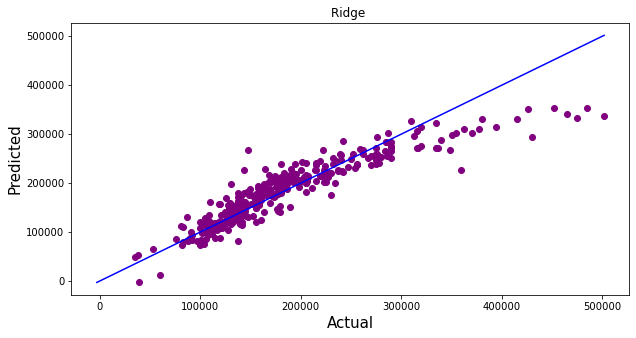

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='purple')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Ridge ")
plt.show()

In [110]:
#Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

array([148524.90231673, 285835.66752053, 237626.52290779, ...,
       153016.14627034,  83326.11510609, 215680.21351168])

In [111]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  148524.902317
1  285835.667521
2  237626.522908
3  223157.235121
4  241600.413697
5  246008.666982
6  186726.646841
7  178432.614974
8  145727.060854
9  108030.006916

In [112]:
#Saving the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

# Completed